[GitHub: Lack of Vacation - Travel Customer Prediction](https://github.com/Lack-of-Vacation/Travel-Customer-Prediction)

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Travel.csv")
data = df.copy()
data2 = df.copy()
df.sample(5)

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
4032      204032          0  37.0  Self Enquiry         1             10.0   
3954      203954          0  36.0  Self Enquiry         1             11.0   
2468      202468          1  35.0  Self Enquiry         1             13.0   
4053      204053          0  31.0  Self Enquiry         2             16.0   
3017      203017          1  27.0  Self Enquiry         3             15.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4032        Salaried  Female                       3                4.0   
3954        Salaried    Male                       4                4.0   
2468  Small Business    Male                       3                4.0   
4053        Salaried    Male                       3                4.0   
3017  Large Business    Male                       3                5.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4032          Basic                    3.0       Married            7.0   
3954          Basic                    3.0       Married            3.0   
2468          Basic                    5.0     Unmarried            4.0   
4053         Deluxe                    3.0       Married            2.0   
3017         Deluxe                    5.0     Unmarried            8.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4032         0                       1       0                       2.0   
3954         0                       4       1                       2.0   
2468         0                       2       1                       2.0   
4053         1                       3       1                       2.0   
3017         0                       3       1                       2.0   

     Designation  MonthlyIncome  
4032   Executive        21513.0  
3954   Executive        20629.0  
2468   Executive        21638.0  
4053     Manager        25025.0  
3017     Manager        24004.0

In [ ]:
numeric_columns = [
    "Age",
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfTrips",
    "MonthlyIncome",
    "NumberOfChildrenVisiting",
    "PitchSatisfactionScore"
]

categorical_columns = [
    "ProdTaken",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
    "CityTier",
    "Passport",
    "OwnCar",
    "PreferredPropertyStar"
]

numeric_columns, categorical_columns

(['Age',
  'DurationOfPitch',
  'NumberOfPersonVisiting',
  'NumberOfFollowups',
  'NumberOfTrips',
  'MonthlyIncome',
  'NumberOfChildrenVisiting',
  'PitchSatisfactionScore'],
 ['ProdTaken',
  'TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation',
  'CityTier',
  'Passport',
  'OwnCar',
  'PreferredPropertyStar'])

# Stage 1: EDA

## 1. Descriptive Statistics

In [ ]:
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

*   Terdapat 8 kolom yang memiliki nilai null yaitu kolom Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome.
*   Tipe data pada setiap kolom sudah sesuai (kolom CityTier sudah diketahui sebelumnya bertipe data string namun diencode menjadi angka)


In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Diatas merupakan informasi jumlah nilai null pada setiap kolom. Nilai null terbanyak terdapat pada kolom DurationOfPitch dan yang paling sedikit terdapat pada kolom TypeOfContact.

**Next Action:** <br>
Kolom yang terdapat nilai null dapat didrop atau input data jika diperlukan.


In [ ]:
df[numeric_columns].describe()

Age  DurationOfPitch  NumberOfPersonVisiting  \
count  4662.000000      4637.000000             4888.000000   
mean     37.622265        15.490835                2.905074   
std       9.316387         8.519643                0.724891   
min      18.000000         5.000000                1.000000   
25%      31.000000         9.000000                2.000000   
50%      36.000000        13.000000                3.000000   
75%      44.000000        20.000000                3.000000   
max      61.000000       127.000000                5.000000   

       NumberOfFollowups  NumberOfTrips  MonthlyIncome  \
count        4843.000000    4748.000000    4655.000000   
mean            3.708445       3.236521   23619.853491   
std             1.002509       1.849019    5380.698361   
min             1.000000       1.000000    1000.000000   
25%             3.000000       2.000000   20346.000000   
50%             4.000000       3.000000   22347.000000   
75%             4.000000       4.000000   25571.000000   
max             6.000000      22.000000   98678.000000   

       NumberOfChildrenVisiting  PitchSatisfactionScore  
count               4822.000000             4888.000000  
mean                   1.187267                3.078151  
std                    0.857861                1.365792  
min                    0.000000                1.000000  
25%                    1.000000                2.000000  
50%                    1.000000                3.000000  
75%                    2.000000                4.000000  
max                    3.000000                5.000000

Dari nilai-nilai statistik diatas, dapat diketahui bahwa kolom 'DurationOfPitch', 'NumberOfTrips', dan 'MonthlyIncome' memiliki distribusi yang skew (terdapat outliers/nilai ekstrim).


*   **Age** : <br>
Selisih mean dan median yaitu sekitar 1.6 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **DurationOfPitch** : <br>
Selisih mean dan median yaitu sekitar 2.4 (agak besar) yang berarti distribusinya cenderung skew dan jika dilihat dari nilai max yang cukup jauh menandakan adanya outliers.
*   **NumberOfPersonVisiting** : <br>
Selisih mean dan median yaitu sekitar 0.1 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfFollowups** : <br>
Selisih mean dan median yaitu sekitar 0.3 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfTrips** : <br>
Selisih mean dan median yaitu sekitar 0.2 (kecil). Distribusinya cenderung skew karena terdapat outliers jika dilihat dari range median dan nilai max yang cukup jauh.
*   **PitchSatisfactionScore** : <br>
Selisih mean dan median yaitu sekitar 0.07 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **NumberOfChildrenVisiting** : <br>
Selisih mean dan median yaitu sekitar 0.1 (kecil) yang berarti distribusinya masih cenderung normal dan tidak memiliki outliers.
*   **MonthlyIncome** : <br>
Selisih mean dan median yaitu sekitar 1200 (besar) yang berarti distribusinya cenderung skew. Memiliki outliers karena nilai maxnya mencapai 98000 sementara nilai min 1000 dan median hanya 22000.

In [ ]:
df[['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'OwnCar']] = df[['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'OwnCar']].astype('category')

In [ ]:
df[categorical_columns].describe()

ProdTaken TypeofContact Occupation Gender ProductPitched  \
count        4888          4863       4888   4888           4888   
unique          2             2          4      3              5   
top             0  Self Enquiry   Salaried   Male          Basic   
freq         3968          3444       2368   2916           1842   

       MaritalStatus Designation  CityTier  Passport  OwnCar  \
count           4888        4888      4888      4888    4888   
unique             4           5         3         2       2   
top          Married   Executive         1         0       1   
freq            2340        1842      3190      3466    3032   

        PreferredPropertyStar  
count                  4862.0  
unique                    3.0  
top                       3.0  
freq                   2993.0

In [ ]:
print(df['Gender'].value_counts())

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Terdapat value yang tidak sesuai pada kolom Gender yaitu 'Fe Male'. Karena pada umumnya gender memiliki 2 jenis yaitu Male dan Female. Dengan adanya value tersebut, maka akan kami anggap kesalahan input yang seharusnya 'Female'.

**Next Action:** <br>
Mengubah kolom yang bernilai 'Fe Male' menjadi 'Female'.

In [ ]:
print(df['MaritalStatus'].value_counts())

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


Nilai yang meragukan: 'Unmarried'. Tidak jelas apa perbedaan antara 'Unmarried' dan 'Single'/'Divorced'.

**Next Action:** <br>
Kolom yang bernilai 'Unmarried' akan diubah/gabungkan menjadi 'Single'.

## 2. Univariate Analysis

### Numeric columns

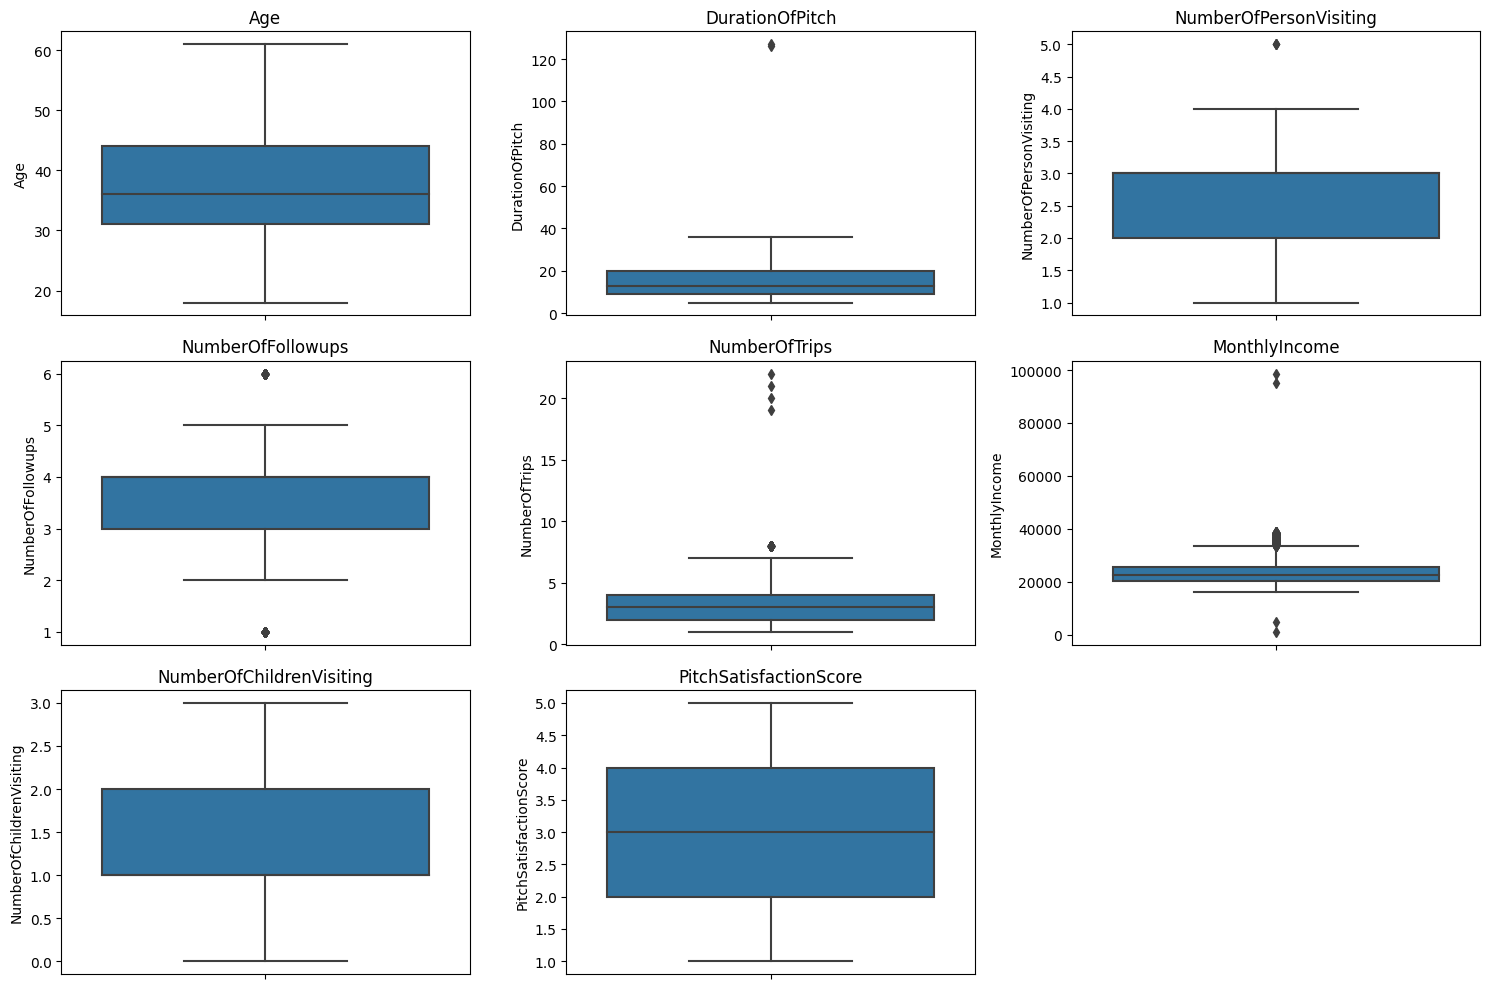

In [ ]:
plt.figure(figsize=(15, 10))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, index)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Age:

- Distribusi usia terlihat cukup simetris.

DurationOfPitch:

- Terdapat outlier yang jelas di ujung atas, menunjukkan bahwa ada beberapa pitch yang berlangsung jauh lebih lama dibandingkan yang lain.

NumberOfPersonVisiting:

- Sebagian besar data terkonsentrasi di angka 2 dan 3, dengan beberapa di angka 1 dan 4, dan sangat sedikit di angka 5.
- Tidak ada outlier yang jelas di sini.

NumberOfFollowups:

- Data tampaknya terpusat antara 3 dan 4 follow-up dengan beberapa di 6.

NumberOfTrips:

- Distribusi ini tampaknya sedikit miring ke kanan, dengan sejumlah besar pelanggan yang melakukan sedikit perjalanan.
- Ada beberapa outlier di ujung atas, menunjukkan ada pelanggan yang melakukan banyak perjalanan.

MonthlyIncome:

- Distribusi ini tampaknya miring ke kanan, dengan mayoritas pelanggan memiliki pendapatan bulanan di sisi yang lebih rendah.
- Ada beberapa outlier di ujung atas yang menunjukkan ada pelanggan dengan pendapatan yang sangat tinggi.
- Saat pra-pemrosesan, mungkin kita ingin mempertimbangkan normalisasi atau transformasi kolom ini untuk mendapatkan distribusi yang lebih simetris.

NumberOfChildrenVisiting:

- Sebagian besar data terpusat pada 1 hingga 2, dengan sejumlah kecil pada 3.
- Tidak ada outlier yang jelas di sini.

Kesimpulan dan Rekomendasi Pra-pemrosesan:

- Kolom DurationOfPitch dan MonthlyIncome mungkin memerlukan transformasi (seperti log transform) untuk mendekatinya dengan distribusi normal, terutama jika kita berencana menggunakan algoritma yang sensitif terhadap distribusi data.


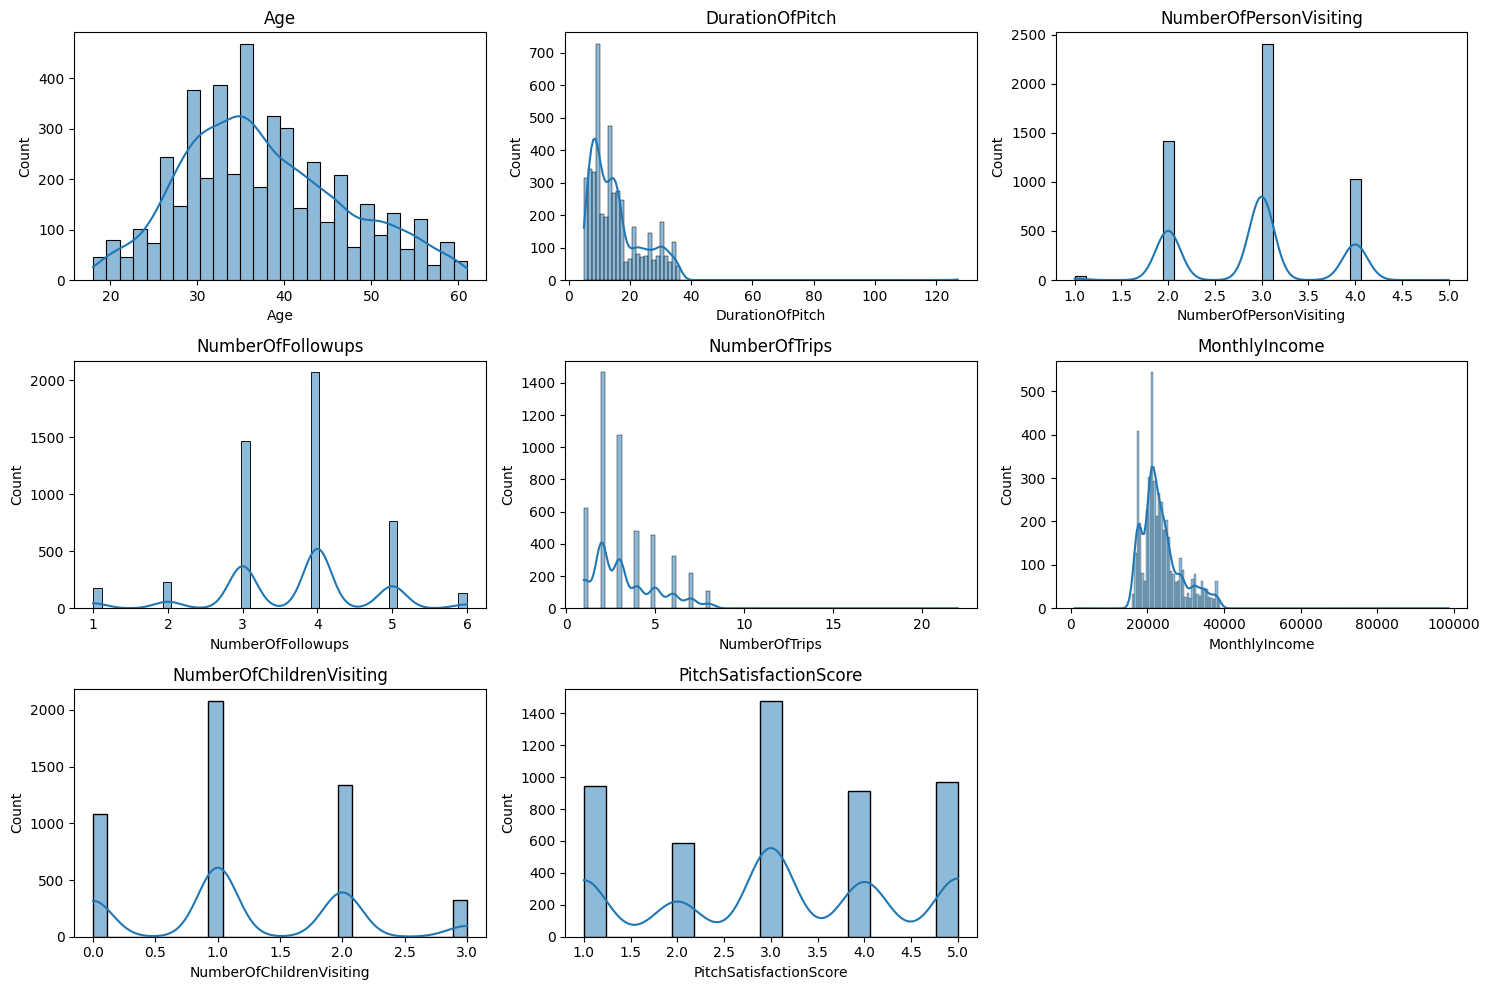

In [ ]:
plt.figure(figsize=(15, 10))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, index)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

Age:

- Distribusi usia tampak simetris dengan puncak di sekitar usia 30-an.
- Ada sedikit kecenderungan untuk memiliki lebih banyak pelanggan di kelompok usia 20-40 tahun.
- Tidak ada bukti kuat dari distribusi yang sangat miring.

DurationOfPitch:

- Distribusi durasi pitch tampaknya sangat miring ke kanan, dengan sebagian besar pitch berlangsung antara 5 hingga 20 menit.
- Ada puncak kecil di sekitar 10 menit, yang mungkin menunjukkan durasi pitch standar.
- Ada beberapa nilai yang lebih tinggi yang menunjukkan durasi pitch yang lebih lama, yang perlu ditelusuri lebih lanjut.

NumberOfPersonVisiting:

- Mayoritas pelanggan mengunjungi dengan 2 atau 3 orang.
- Tidak ada bukti kuat dari distribusi yang sangat miring.

NumberOfFollowups:

- Mayoritas data berpusat di sekitar 3-4 follow-up.

NumberOfTrips:

- Distribusi ini tampaknya sedikit miring ke kanan, dengan mayoritas pelanggan melakukan 1-4 perjalanan.
- Ada beberapa nilai yang lebih tinggi yang menunjukkan jumlah perjalanan yang lebih tinggi, mungkin menunjukkan pelanggan yang sering bepergian.

MonthlyIncome:

- Distribusi ini sangat miring ke kanan, dengan sebagian besar pelanggan memiliki pendapatan bulanan di sisi yang lebih rendah.
- Ada beberapa nilai yang sangat tinggi yang menunjukkan pendapatan yang lebih tinggi, mungkin menunjukkan segmen pelanggan berpendapatan tinggi.

NumberOfChildrenVisiting:

- Sebagian besar pelanggan mengunjungi dengan 0 atau 1 anak.
- Ada kecenderungan untuk memiliki lebih sedikit pelanggan yang mengunjungi dengan 2 atau lebih anak.

Kesimpulan dan Rekomendasi Pra-pemrosesan:

- Kolom seperti DurationOfPitch dan MonthlyIncome yang memiliki distribusi yang sangat miring mungkin memerlukan transformasi (seperti log transform) untuk mendekatinya dengan distribusi normal.

- Kolom dengan variasi yang rendah atau dengan sebagian besar data yang terkonsentrasi di sekitar satu nilai mungkin kurang informatif untuk analisis tertentu. Namun, sebelum memutuskan untuk mengabaikannya, kita harus memahami konteks bisnis dan pentingnya variabel tersebut.

- Sebagai langkah awal, kita mungkin juga ingin menangani nilai yang hilang di beberapa kolom dengan strategi yang sesuai.

### Categorical columns

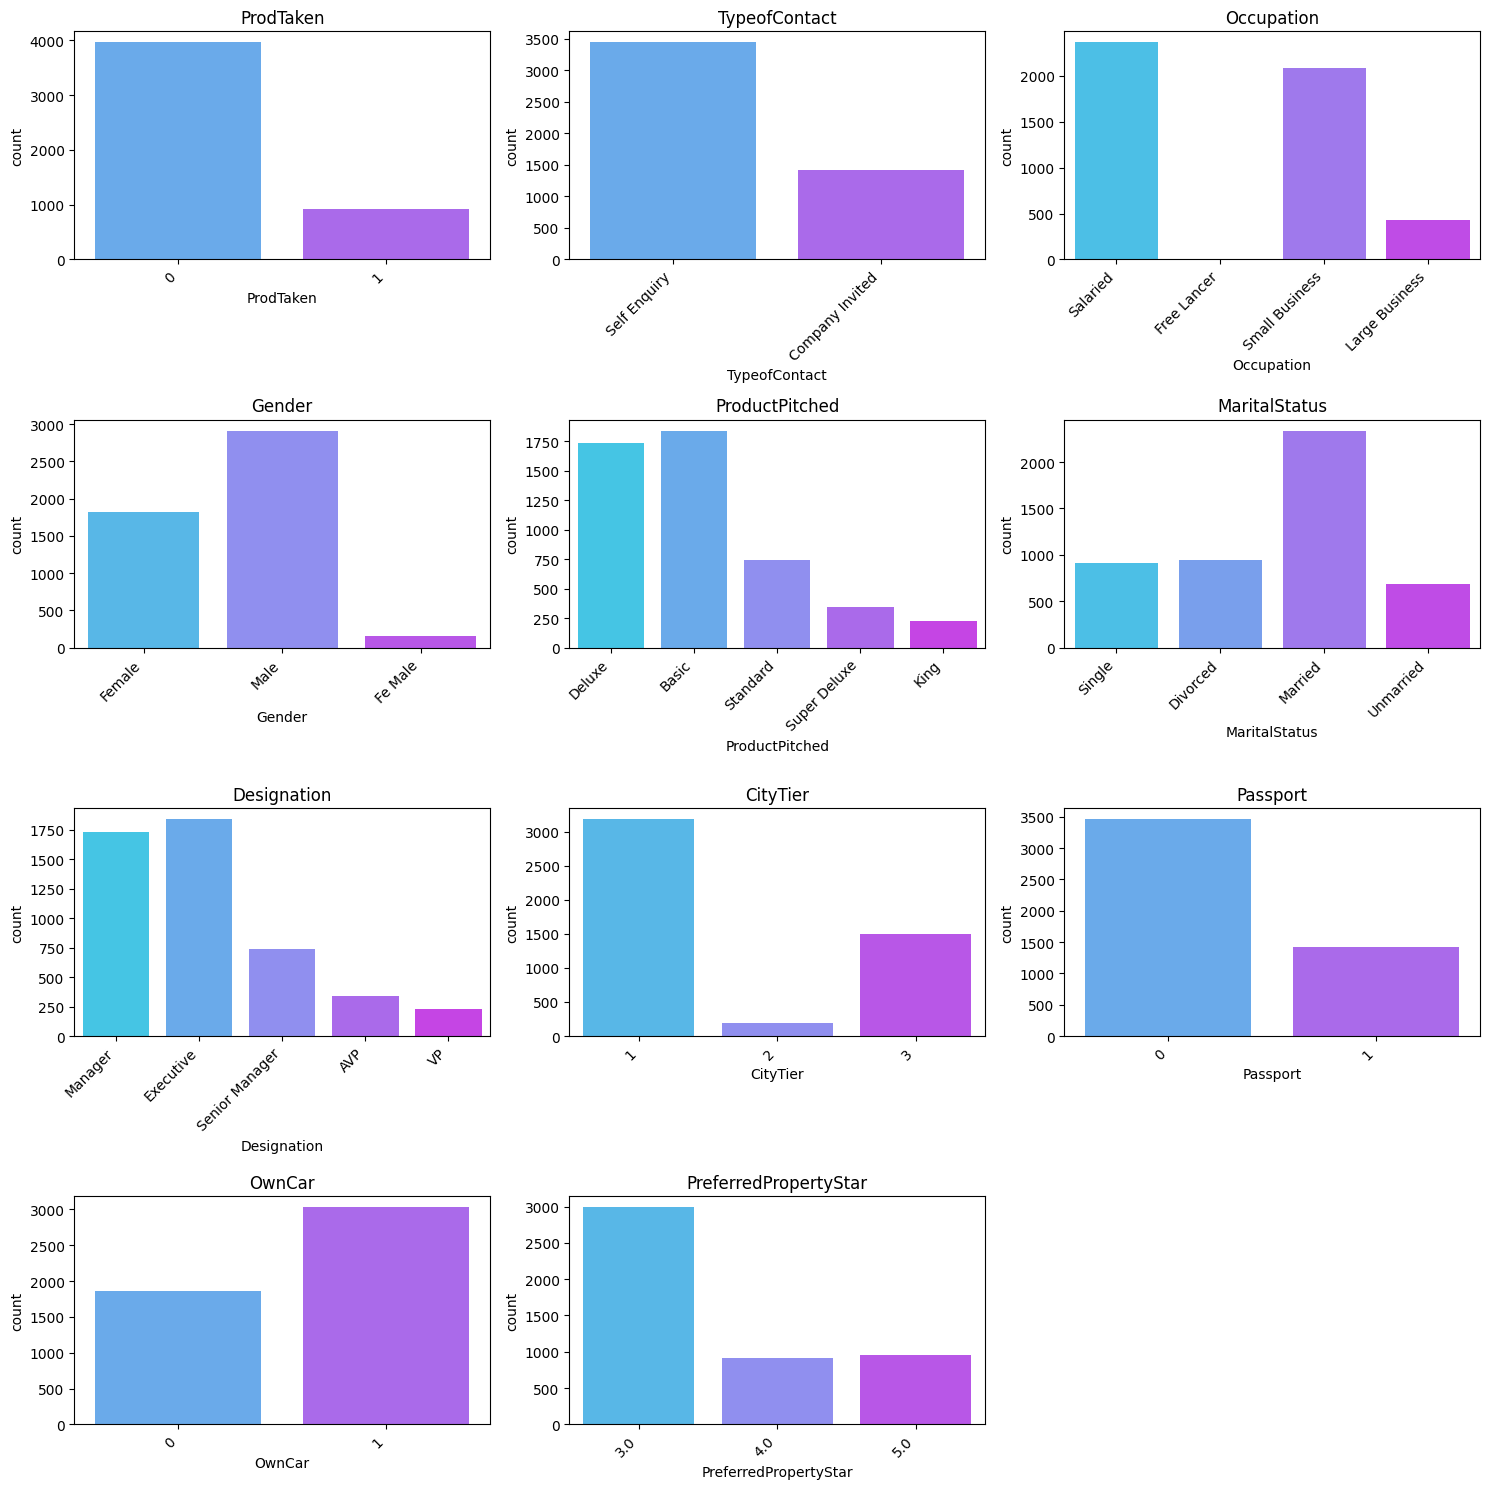

In [ ]:
plt.figure(figsize=(15, 15))

for index, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, index)
    sns.countplot(data=df, x=column, palette="cool")
    plt.title(column)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

plt.show()

ProdTaken:

- Mayoritas pelanggan tampaknya tidak mengambil produk.
- Distribusi ini sangat miring ke salah satu kategori, menunjukkan ketidakseimbangan dalam data.

TypeofContact:

- Sebagian besar pelanggan dikontak melalui jenis kontak "Self Enquiry".

Occupation:

- Mayoritas pelanggan memiliki pekerjaan sebagai "Salaried", diikuti oleh "Small Business" dan "Large Business".
- Sangat sedikit pelanggan yang dikategorikan sebagai "Free Lancer".

Gender:

- Mayoritas pelanggan adalah laki-laki, diikuti oleh perempuan.
- Ada kategori ketiga, "Fe Male", yang tampaknya adalah kesalahan entri data. Ini harus ditangani saat pra-pemrosesan karena "Fe Male" kemungkinan besar seharusnya "Female".

ProductPitched:

- Produk yang paling sering dipitch adalah "Basic", diikuti oleh "Deluxe", "Standard", "Super Deluxe", dan "King".

MaritalStatus:

- Sebagian besar pelanggan adalah "Married", diikuti oleh "Divorced", "Single", dan "Unmarried".

Designation:

- Sebagian besar pelanggan memiliki desain "Executive", diikuti oleh "Manager" dan "Senior Manager".
- Sangat sedikit pelanggan yang memiliki desain "VP".

CityTier:

- Mayoritas pelanggan berasal dari "City Tier 1", diikuti oleh "City Tier 2" dan "City Tier 3".

Passport:

- Mayoritas pelanggan tampaknya tidak memiliki paspor.

PitchSatisfactionScore:

- Distribusi skor kepuasan tampaknya cukup seimbang, dengan semua kategori memiliki jumlah pelanggan yang serupa.

OwnCar:

- Sebagian besar pelanggan memiliki mobil.

PreferredPropertyStar:
- Sebagian besar pelanggan lebih memilih properti bintang 3, diikuti oleh bintang 4 dan 5.


**Rekomendasi Pra-pemrosesan**

Keseimbangan Kelas Target (ProdTaken):

- Kolom target ProdTaken menunjukkan ketidakseimbangan kelas, di mana mayoritas pelanggan tidak mengambil produk.
- Teknik penyeimbangan seperti oversampling kelas minoritas atau undersampling kelas mayoritas dapat dipertimbangkan saat mempersiapkan data untuk pemodelan.
- Teknik sintetis seperti SMOTE (Synthetic Minority Over-sampling Technique) juga bisa menjadi pilihan untuk menangani ketidakseimbangan kelas.

Koreksi Kesalahan Entri Data:

- Di kolom Gender, "Fe Male" seharusnya dikoreksi menjadi "Female". Kesalahan entri seperti ini dapat mempengaruhi kualitas model dan harus diperbaiki.

Transformasi Variabel Miring:

- Kolom seperti DurationOfPitch dan MonthlyIncome memiliki distribusi yang miring dan mungkin memerlukan transformasi, seperti log transform, untuk mendekatinya dengan distribusi yang lebih normal.
- Transformasi ini akan membantu dalam mempersiapkan data untuk model yang memerlukan asumsi distribusi normal.

Pengkodean Variabel Kategorik:

- Variabel kategorik seperti TypeofContact, Occupation, Gender, dll., perlu dikodekan sebelum digunakan dalam pemodelan. Teknik seperti one-hot encoding atau label encoding dapat digunakan tergantung pada jenis model yang akan digunakan.

Penanganan Outliers:

- Kolom seperti DurationOfPitch memiliki outlier yang mungkin mempengaruhi performa model. Outlier ini dapat dihapus, dikap atau digantikan dengan nilai lain seperti median atau mean.

Normalisasi atau Penskalaan:

- Variabel numerik dengan skala yang berbeda mungkin perlu dinormalkan atau diskalakan, terutama jika kita berencana menggunakan algoritma yang sensitif terhadap skala seperti SVM atau k-NN.

## 3. Multivariate Analysis

### a. Korelasi Fitur-Label

In [ ]:
# Memisahkan kolom numerik
num_columns = data[[
    "ProdTaken",
    "Age",
    "DurationOfPitch",
    "NumberOfPersonVisiting",
    "NumberOfFollowups",
    "NumberOfTrips",
    "MonthlyIncome",
    "NumberOfChildrenVisiting",
    "PitchSatisfactionScore"
]]

# Korelasi fitur numerik
num_columns.corr()

ProdTaken       Age  DurationOfPitch  \
ProdTaken                  1.000000 -0.147254         0.078257   
Age                       -0.147254  1.000000        -0.012063   
DurationOfPitch            0.078257 -0.012063         1.000000   
NumberOfPersonVisiting     0.009627  0.011621         0.065141   
NumberOfFollowups          0.112171 -0.002577         0.009434   
NumberOfTrips              0.018898  0.184905         0.009715   
MonthlyIncome             -0.130585  0.464869        -0.006252   
NumberOfChildrenVisiting   0.007421  0.007370         0.031408   
PitchSatisfactionScore     0.051394  0.018510        -0.002880   

                          NumberOfPersonVisiting  NumberOfFollowups  \
ProdTaken                               0.009627           0.112171   
Age                                     0.011621          -0.002577   
DurationOfPitch                         0.065141           0.009434   
NumberOfPersonVisiting                  1.000000           0.328569   
NumberOfFollowups                       0.328569           1.000000   
NumberOfTrips                           0.195223           0.139517   
MonthlyIncome                           0.195134           0.176503   
NumberOfChildrenVisiting                0.610621           0.286425   
PitchSatisfactionScore                 -0.019581           0.004054   

                          NumberOfTrips  MonthlyIncome  \
ProdTaken                      0.018898      -0.130585   
Age                            0.184905       0.464869   
DurationOfPitch                0.009715      -0.006252   
NumberOfPersonVisiting         0.195223       0.195134   
NumberOfFollowups              0.139517       0.176503   
NumberOfTrips                  1.000000       0.139105   
MonthlyIncome                  0.139105       1.000000   
NumberOfChildrenVisiting       0.168795       0.201643   
PitchSatisfactionScore        -0.004378       0.030421   

                          NumberOfChildrenVisiting  PitchSatisfactionScore  
ProdTaken                                 0.007421                0.051394  
Age                                       0.007370                0.018510  
DurationOfPitch                           0.031408               -0.002880  
NumberOfPersonVisiting                    0.610621               -0.019581  
NumberOfFollowups                         0.286425                0.004054  
NumberOfTrips                             0.168795               -0.004378  
MonthlyIncome                             0.201643                0.030421  
NumberOfChildrenVisiting                  1.000000                0.000878  
PitchSatisfactionScore                    0.000878                1.000000

<Axes: >

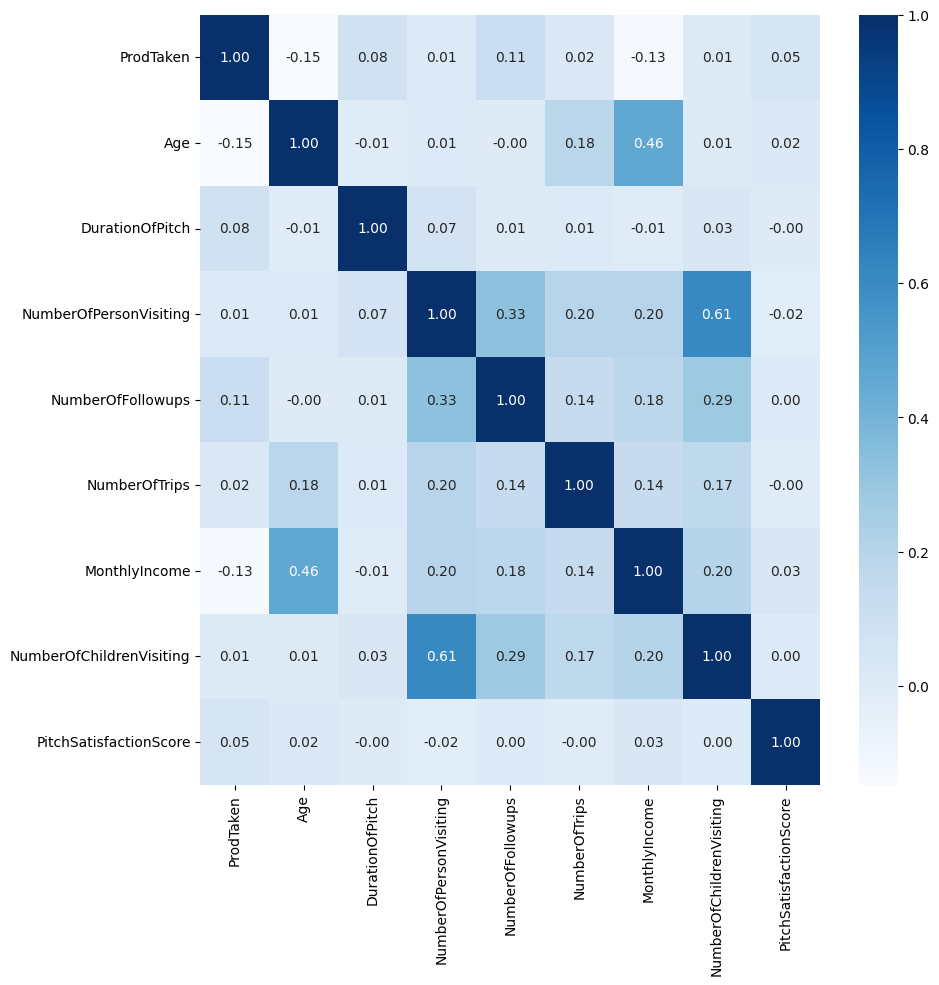

In [ ]:
# Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(num_columns.corr(), cmap='Blues', annot=True, fmt='.2f')

**1. Age (Usia) vs. ProdTaken:** <br>
Korelasi: -0.147254 ~ -0.15 <br>
Interpretasi: Terdapat korelasi negatif yang lemah antara usia dan keputusan untuk membeli produk ("ProdTaken"). Ini bisa berarti bahwa orang yang lebih muda mungkin lebih cenderung membeli produk daripada orang yang lebih tua. <br>
**2. DurationOfPitch (Durasi Presentasi) vs. ProdTaken:** <br>
Korelasi: 0.078257 ~ 0.08<br>
Interpretasi: Terdapat korelasi positif yang lemah antara durasi presentasi dan keputusan untuk membeli produk. Ini mungkin berarti bahwa presentasi yang lebih lama dapat meningkatkan kemungkinan seseorang untuk membeli produk. <br>
**3. NumberOfPersonVisiting (Jumlah Orang yang Berkunjung) vs. ProdTaken:** <br>
Korelasi: 0.009627 ~ 0.01 <br>
Interpretasi: Korelasi ini sangat lemah, sehingga tidak ada hubungan yang signifikan antara jumlah orang yang berkunjung dan keputusan untuk membeli produk. <br>
**4. NumberOfFollowups vs. ProdTaken:** <br>
Korelasi: 0.112171 ~ 0.11 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara jumlah tindak lanjut yang dilakukan dan keputusan untuk membeli produk. Ini mungkin menunjukkan bahwa lebih banyak tindak lanjut dapat meningkatkan kemungkinan seseorang untuk membeli produk. <br>
**5. NumberOfTrips vs. ProdTaken:** <br>
Korelasi: 0.018898 ~ 0.02 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara jumlah perjalanan yang dilakukan dan keputusan untuk membeli produk. Ini bisa berarti bahwa orang yang sering bepergian cenderung lebih cenderung membeli produk. <br>

**6. MonthlyIncome (Pendapatan Bulanan) vs. ProdTaken:** <br>
Korelasi: -0.130585 ~ -0.13 <br>
Interpretasi: Terdapat korelasi negatif yang sedang antara pendapatan bulanan dan keputusan untuk membeli produk. Ini bisa berarti bahwa orang dengan pendapatan yang lebih rendah cenderung lebih cenderung membeli produk.<br>

**7. NumberOfChildrenVisiting vs. ProdTaken:** <br>
Korelasi: 0.007421 ~ 0.01 <br>
Interpretasi: Korelasi ini sangat lemah, sehingga tidak ada hubungan yang signifikan antara jumlah anak yang berkunjung dan keputusan untuk membeli produk. <br>

**8. PitchSatisfactionScore vs. ProdTaken:** <br>
Korelasi: 0.051394 ~ 0.05 <br>
Interpretasi: Terdapat korelasi positif yang lemah antara skor kepuasan presentasi dan keputusan untuk membeli produk. Ini menunjukkan bahwa pelanggan yang lebih puas dengan presentasi cenderung lebih cenderung membeli produk. <br>




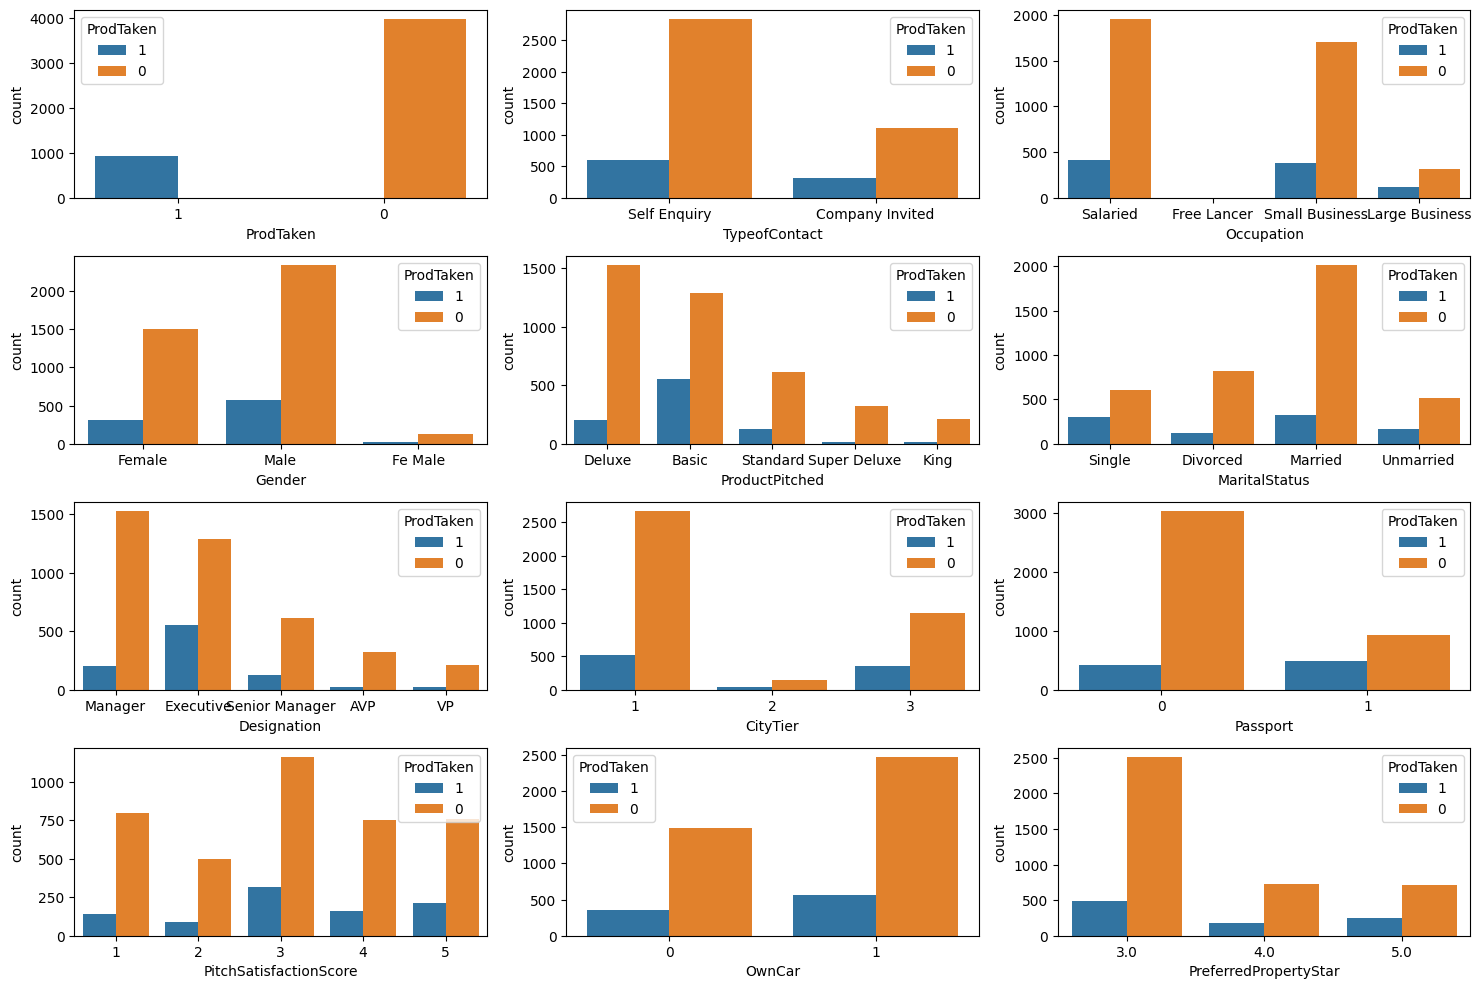

In [ ]:
# Convert 'ProdTaken' to a categorical variable
data2['ProdTaken'] = data2['ProdTaken'].astype(str)

# List of categorical features (fitur kategorikal)
cat_columns = [
    "ProdTaken",
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
    "CityTier",
    "Passport",
    "PitchSatisfactionScore",
    "OwnCar",
    "PreferredPropertyStar"
]

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

# Iterate through the categorical features and create countplots
for i, ax in enumerate(axes.flat):
    if i < len(cat_columns):
        sns.countplot(data=data2, x=cat_columns[i], hue='ProdTaken', ax=ax)

# Remove any remaining empty subplots
for i in range(len(cat_columns), 6):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

In [ ]:
# Create an empty dictionary to store frequency counts for each feature
frekuensi_fitur_hue = {}

# Iterate through the categorical features and calculate frequency counts
for fitur in cat_columns:
    frekuensi = data2.groupby([fitur, 'ProdTaken']).size().unstack()
    frekuensi_fitur_hue[fitur] = frekuensi

# Print the frequency counts for each feature
for fitur, frekuensi in frekuensi_fitur_hue.items():
    print(f"Frekuensi kategori dalam fitur {fitur} dengan mempertimbangkan 'ProdTaken':")
    print(frekuensi)
    print()

Frekuensi kategori dalam fitur ProdTaken dengan mempertimbangkan 'ProdTaken':
ProdTaken       0      1
ProdTaken               
0          3968.0    NaN
1             NaN  920.0

Frekuensi kategori dalam fitur TypeofContact dengan mempertimbangkan 'ProdTaken':
ProdTaken           0    1
TypeofContact             
Company Invited  1109  310
Self Enquiry     2837  607

Frekuensi kategori dalam fitur Occupation dengan mempertimbangkan 'ProdTaken':
ProdTaken            0      1
Occupation                   
Free Lancer        NaN    2.0
Large Business   314.0  120.0
Salaried        1954.0  414.0
Small Business  1700.0  384.0

Frekuensi kategori dalam fitur Gender dengan mempertimbangkan 'ProdTaken':
ProdTaken     0    1
Gender              
Fe Male     130   25
Female     1500  317
Male       2338  578

Frekuensi kategori dalam fitur ProductPitched dengan mempertimbangkan 'ProdTaken':
ProdTaken          0    1
ProductPitched           
Basic           1290  552
Deluxe          1528  204
Ki

**1. TypeofContact vs. ProdTaken** <br>
Type Self Enquiry kurang efektif dalam mempengaruhi pembelian. <br>
**2. Occupation vs. ProdTaken** <br>
Pekerjaan Free Lancer kurang membeli produk <br>
Pekerjaan Salaried paling banyak membeli produk tetapi jika dibandingkan dengan total orang yang bekerja salaried, angka tersebut tergolong kecil. <br>
**3. Gender vs. ProdTaken** <br>
Jenis Kelamin Male lebih cenderung membeli produk.<br>
**4. ProductPitched vs. ProdTaken** <br>
Pelanggan dengan Produk Basic paling banyak membeli produk baru.<br>
Pelanggan dengan Produk King dan Super Deluxe kurang membeli produk baru.<br>
**5. MaritalStatus vs. ProdTaken** <br>
Penduduk yang sudah menikah paling banyak membeli produk tetapi jika dibandingkan dengan total penduduk yang menikah, angka tersebut tergolong kecil <br>
Penduduk Single dan Unmarried juga banyak yang membeli produk. Jika dibandingkan dengan total penduduk single dan unmarried, ini bisa dijadikan target pelanggan perusahaan.<br>
**6. Designation vs. ProdTaken** <br>
Jabatan Executif cenderung membeli produk.<br>
Jabatan AVP kurang membeli produk.<br>
**7. CityTier vs. ProdTaken**<br>
Penduduk dengan CityTier 3 dan 1 cenderung membeli produk.<br>
**8. Passport vs. ProdTaken**<br>
Penduduk yang memiliki passport cenderung membeli produk.<br>
**9. PitchSatisfactionScore vs. ProdTaken**<br>
Pelanggan dengan skor kepuasaan 5 cenderung membeli produk.<br>
Pelanggan dengan skor kepuasaan 3 juga banyak yang memutuskan membeli produk.<br>
**10. OwnCar vs. ProdTaken**<br>
Pelanggan yang tidak mempunyai mobil cenderung membeli produk.<br>
Meskipun pelanggan yang memiliki mobil lebih banyak yang membeli produk tetapi jika dibandingkan dengan total pelanggan yang memiliki mobil, itu tergolong kecil.<br>
**11. PreferedPropertyStar vs. ProdTaken**<br>
Pelaggan dengan preferren property star 5.0 cenderung membeli produk.

**KESIMPULAN**
- Kolom CustomerID tidak diperlkan karena tidak mempengaruhi label (ProdTaken).
- Kolom numerik (Age dan MonthlyIncome) harus dipertahankan karena memiliki korelasi yang tinggi dengan label.
- Kolom dengan data kategorik dipertahankan.
- Kolom yang tidak berkorelasi juga dipertahankan karena mungkin akan berguna di analisis yang selanjutnya.


### b. Korelasi Fitur-Fitur

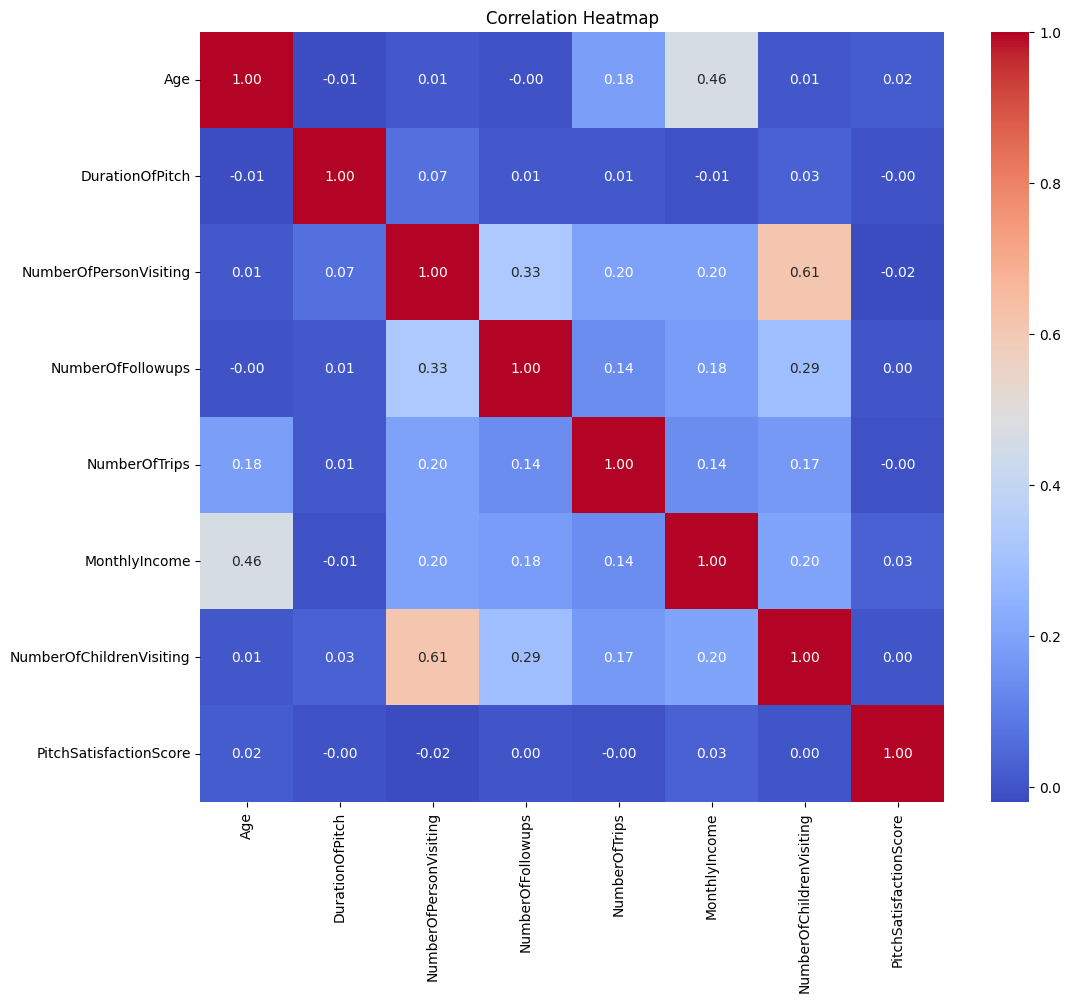

In [ ]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = data2[numeric_columns].corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x1000 with 0 Axes>

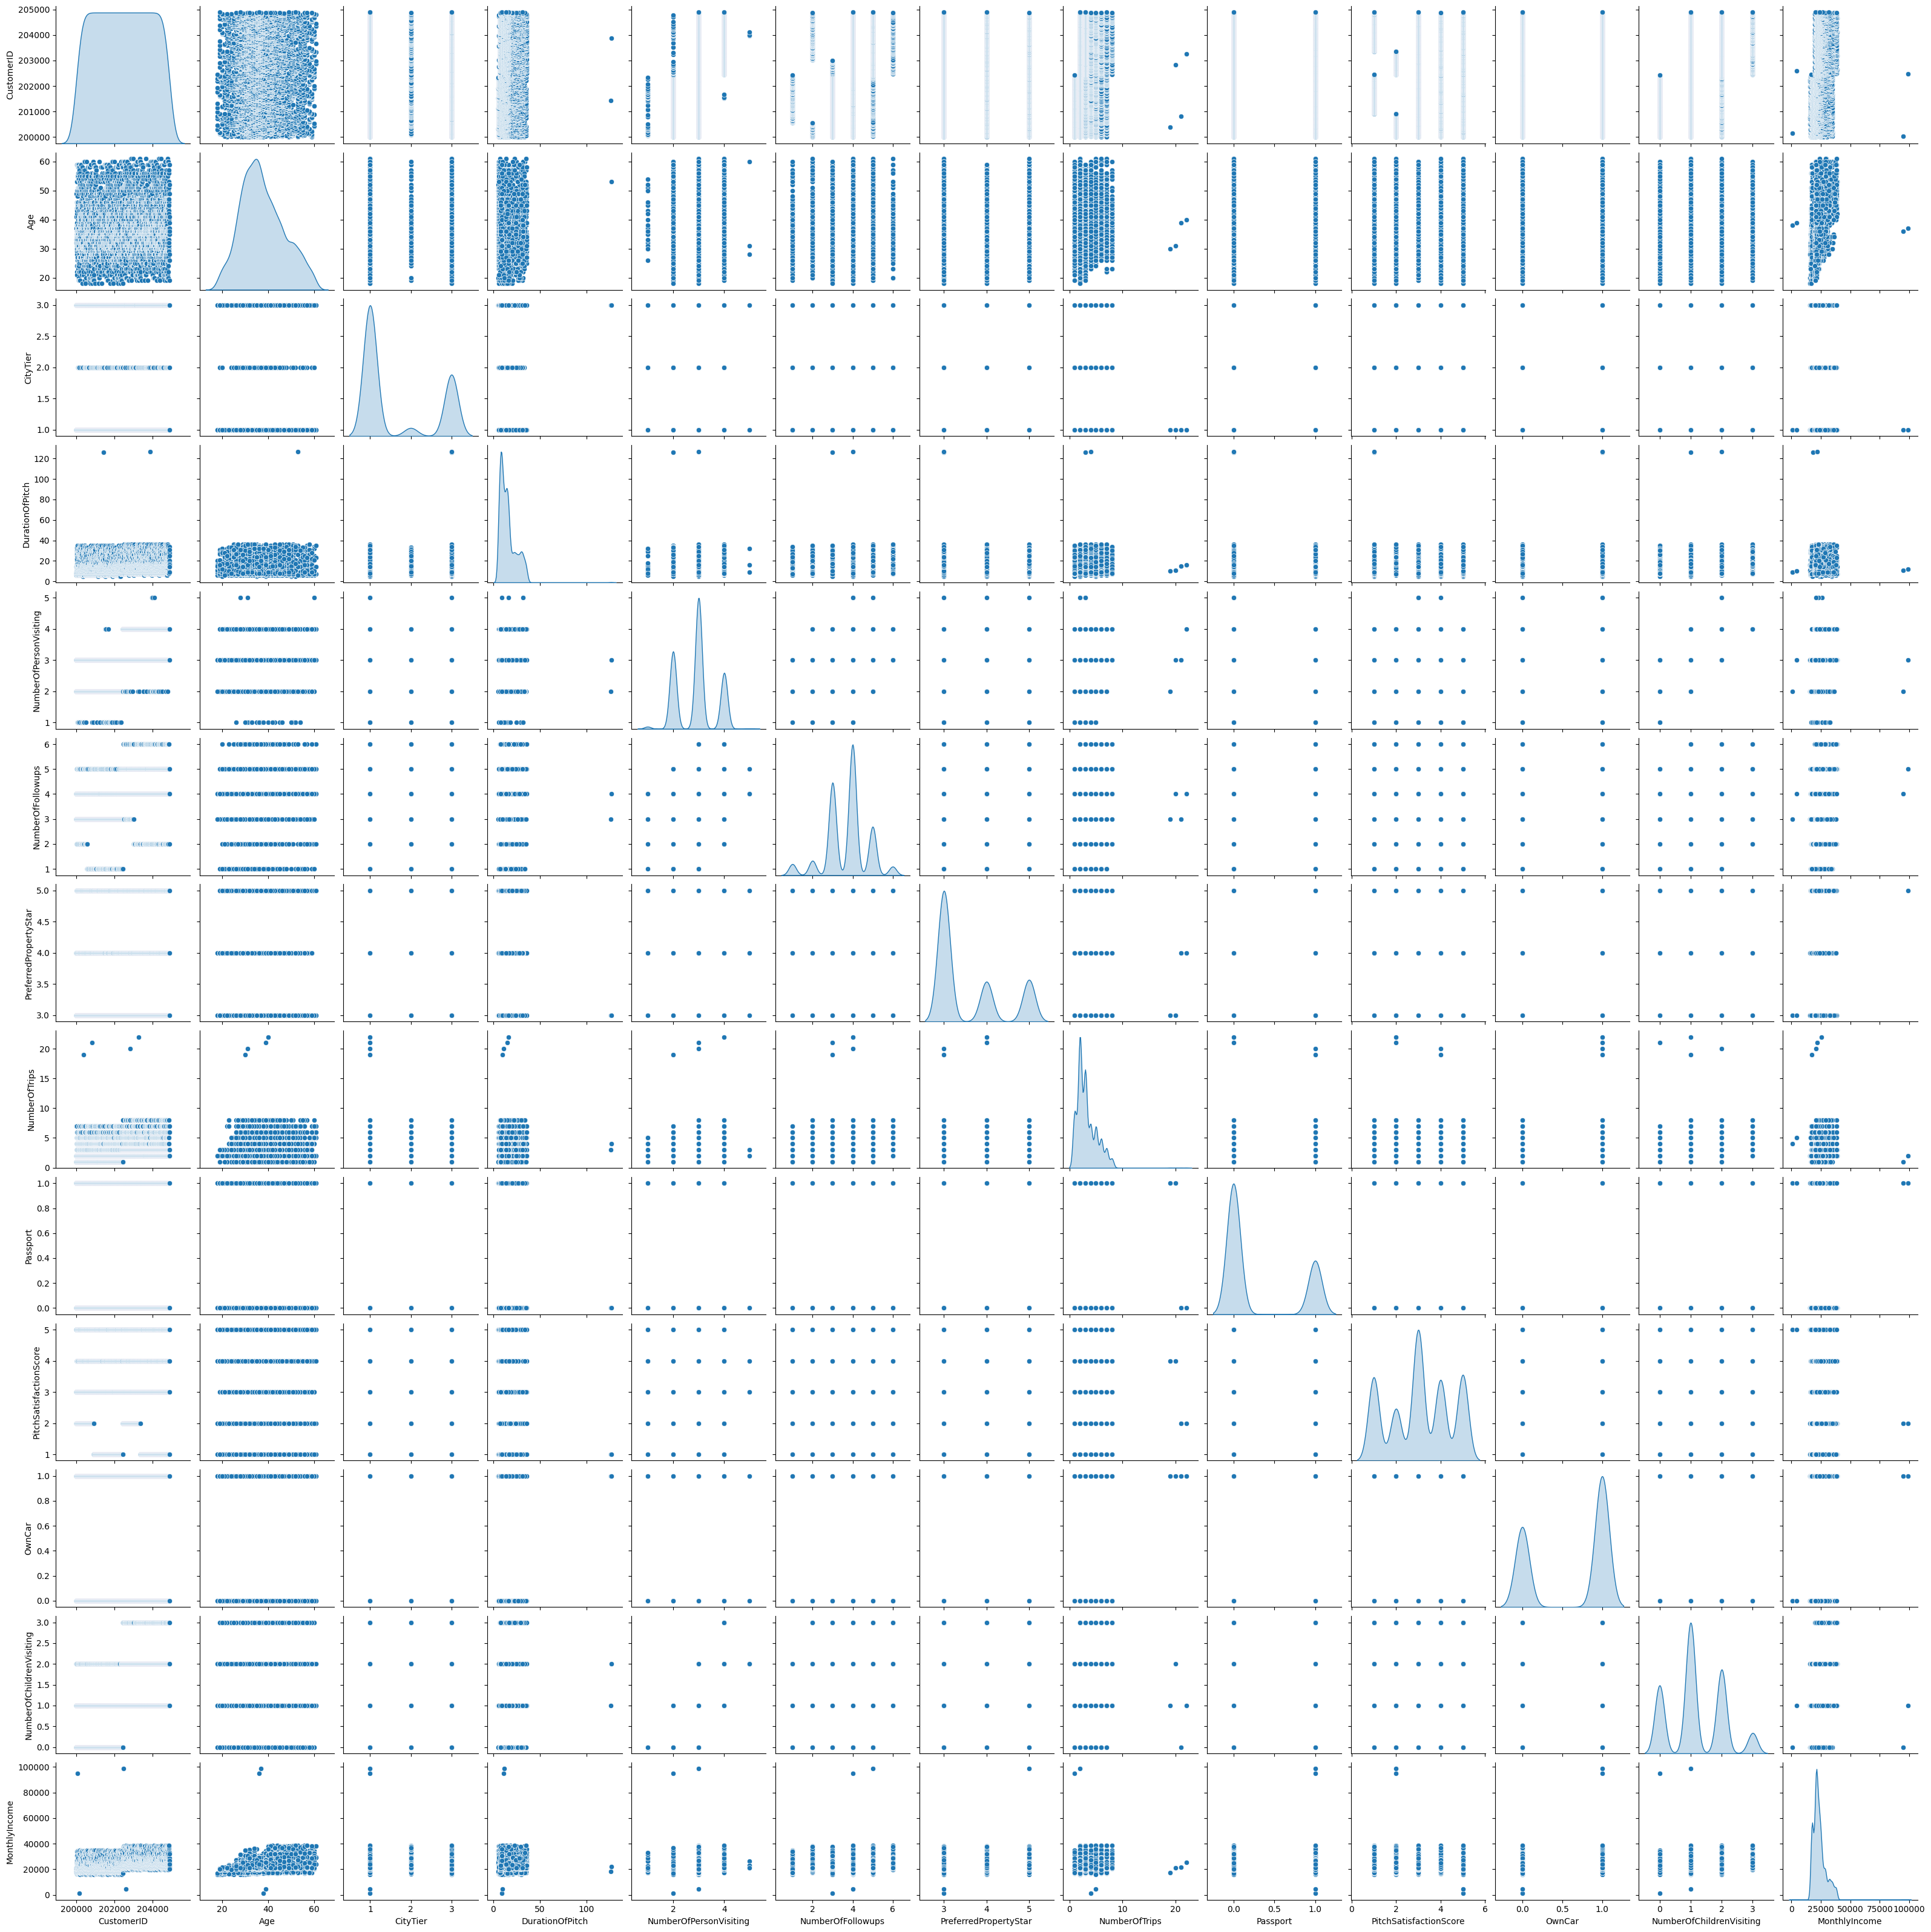

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(data2, diag_kind='kde')

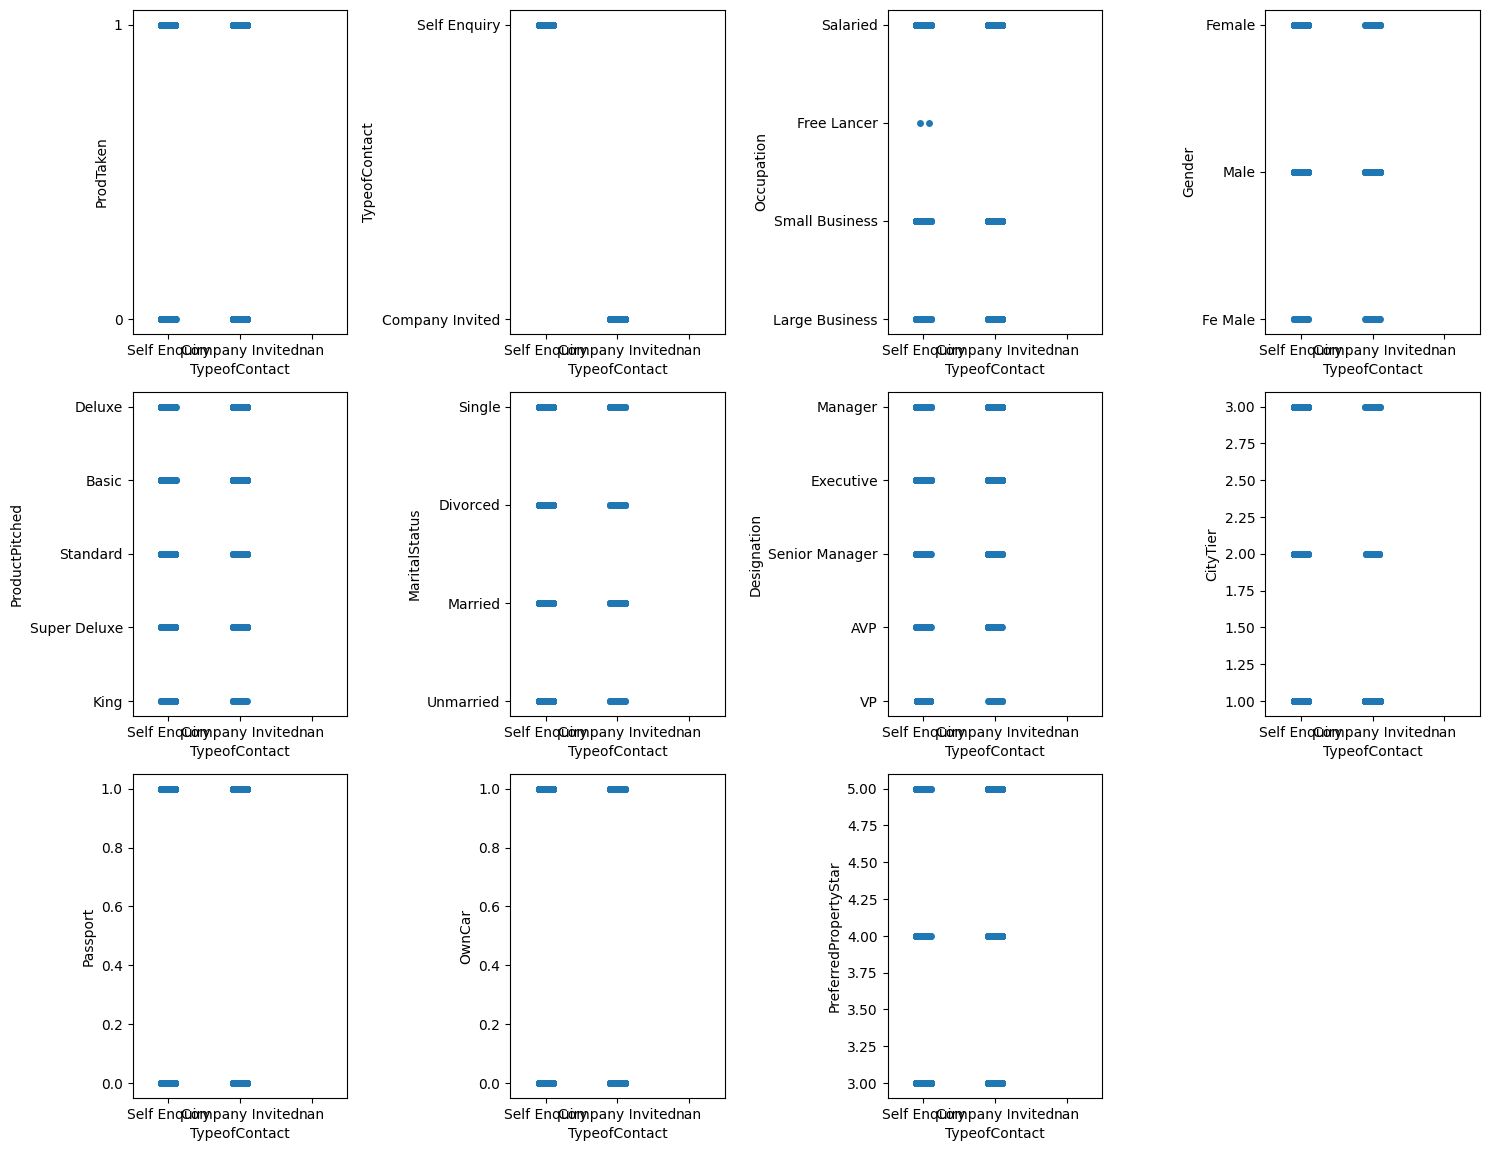

In [ ]:
#korelasi antara feature nums dan cats
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='TypeofContact', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

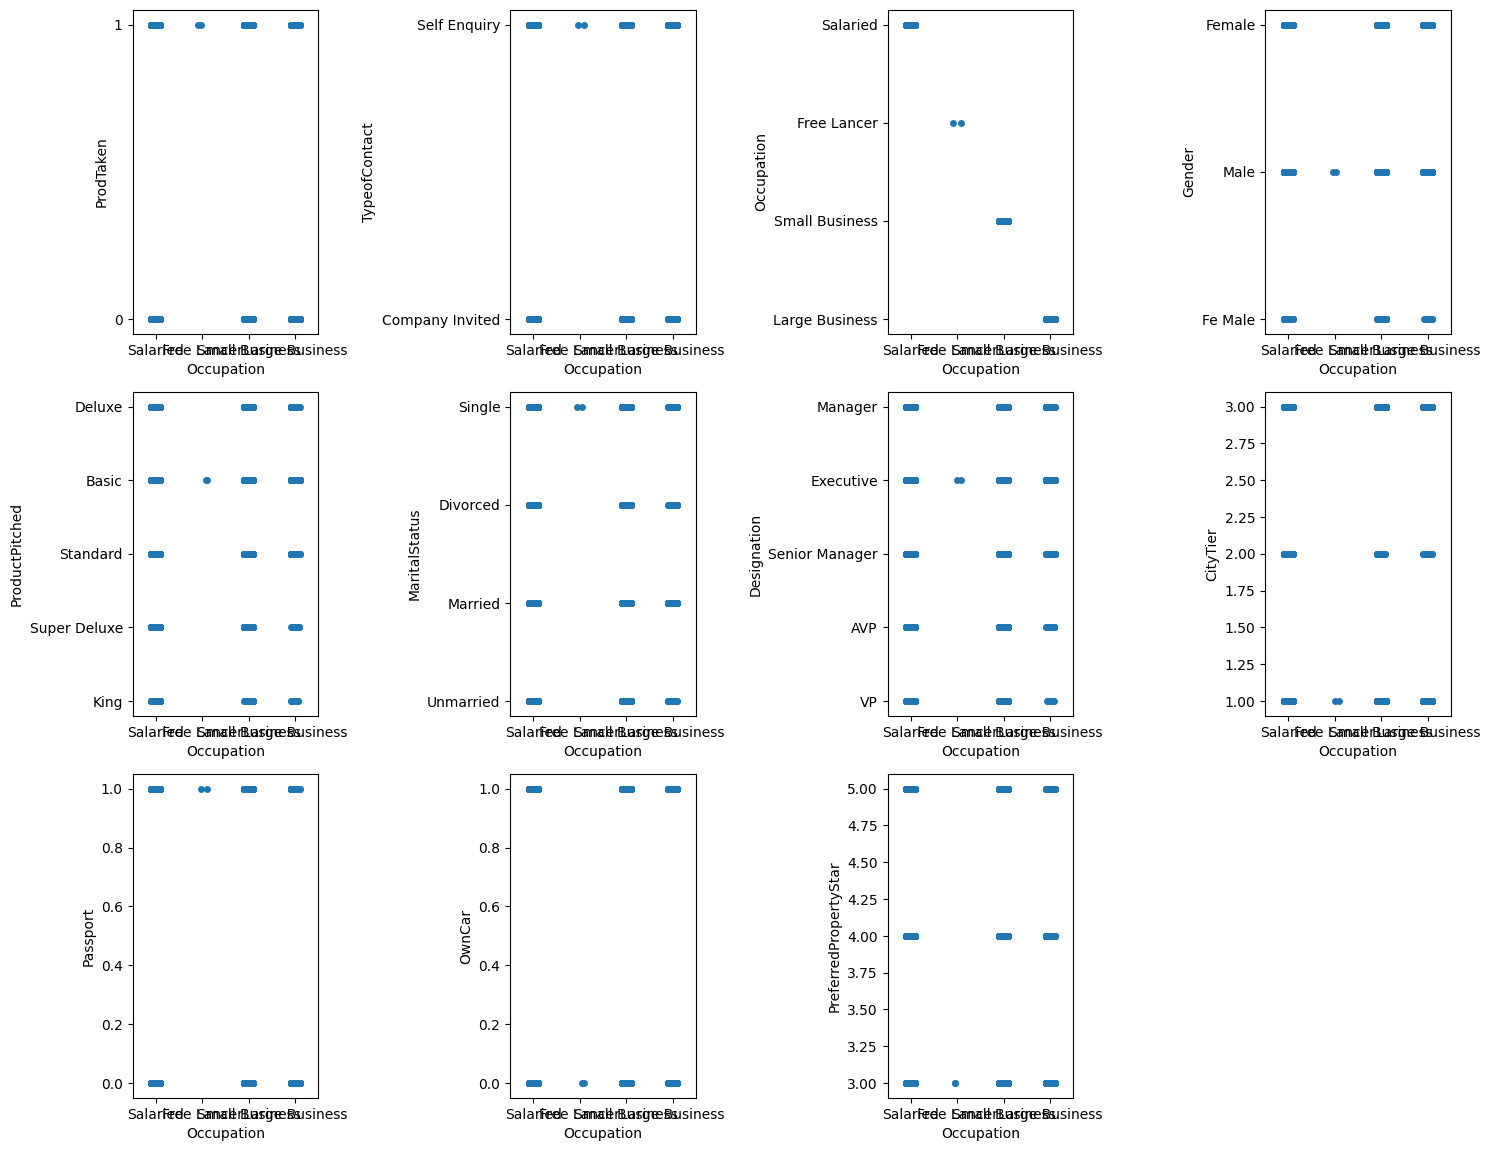

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='Occupation', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

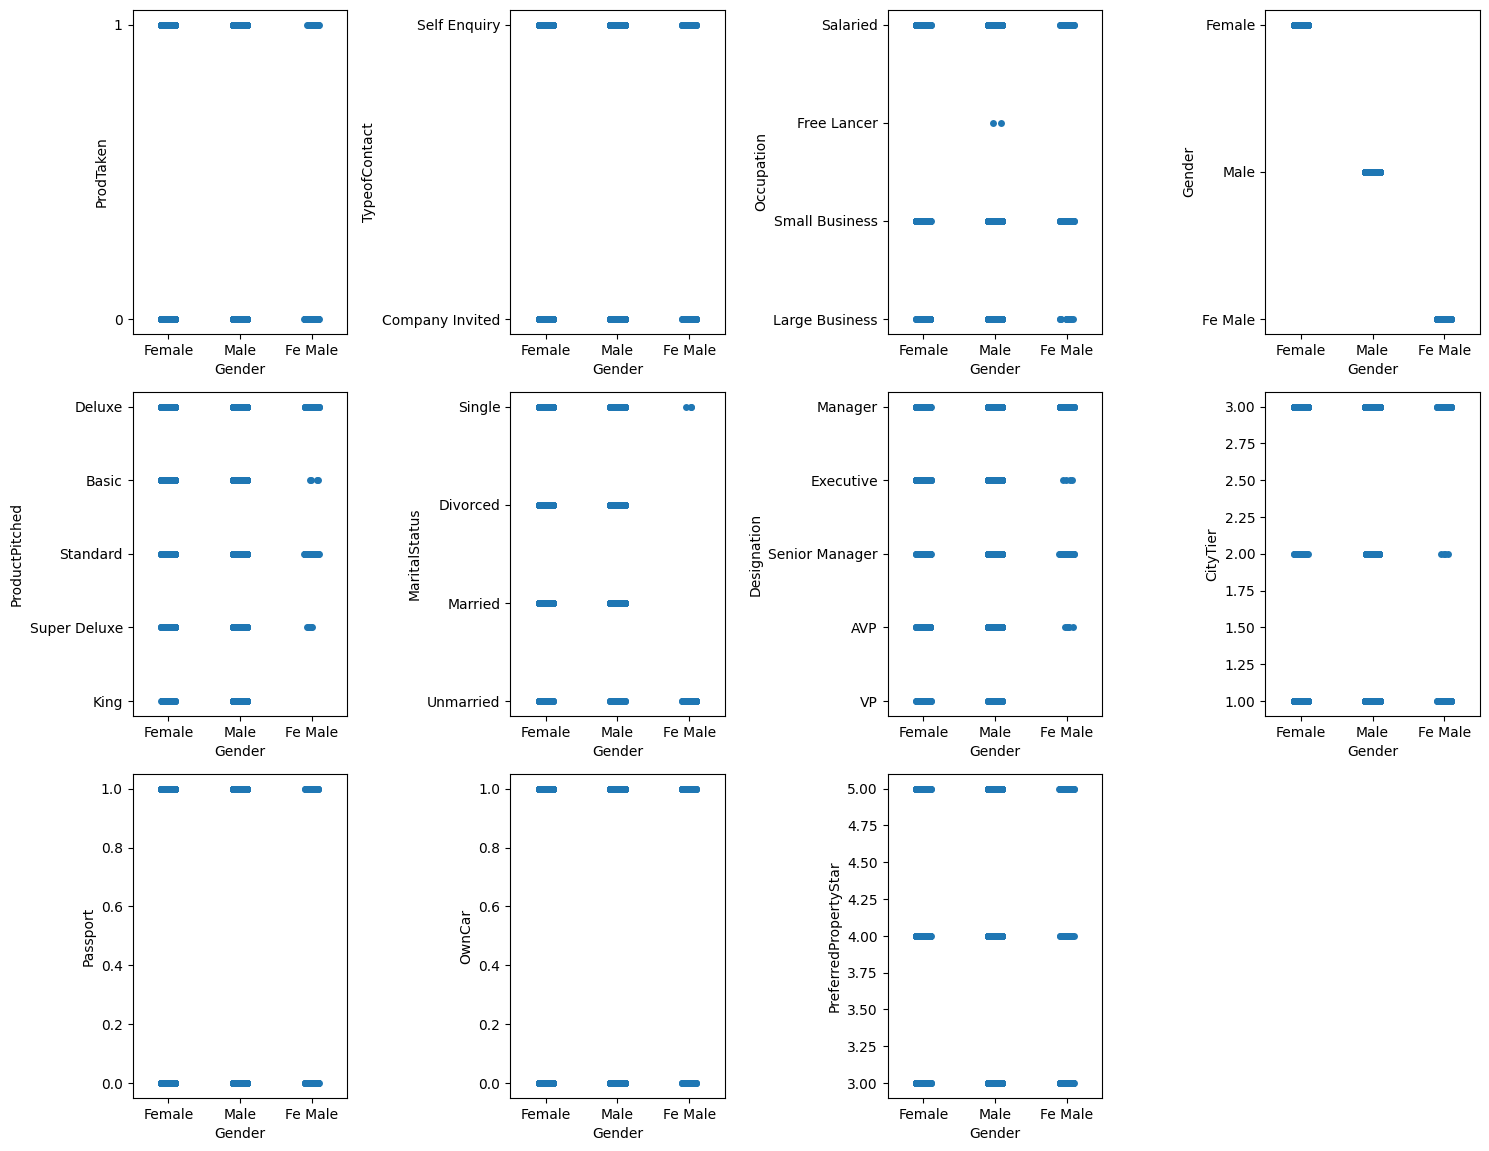

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='Gender', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

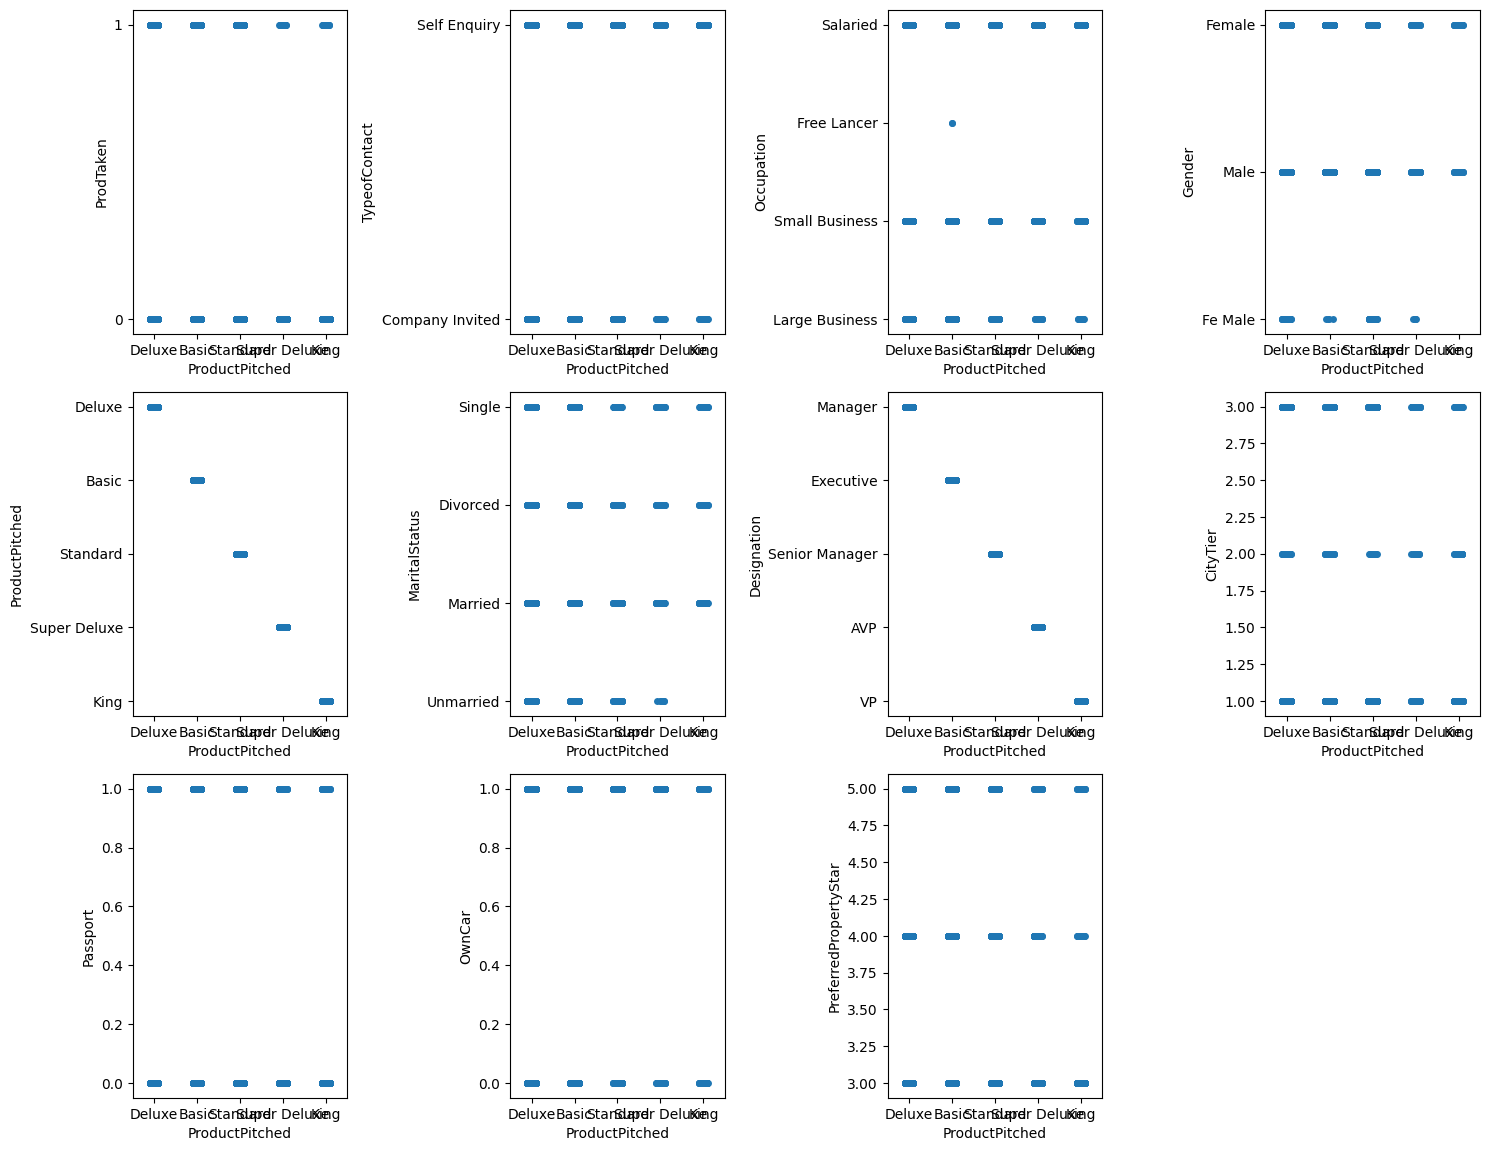

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='ProductPitched', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

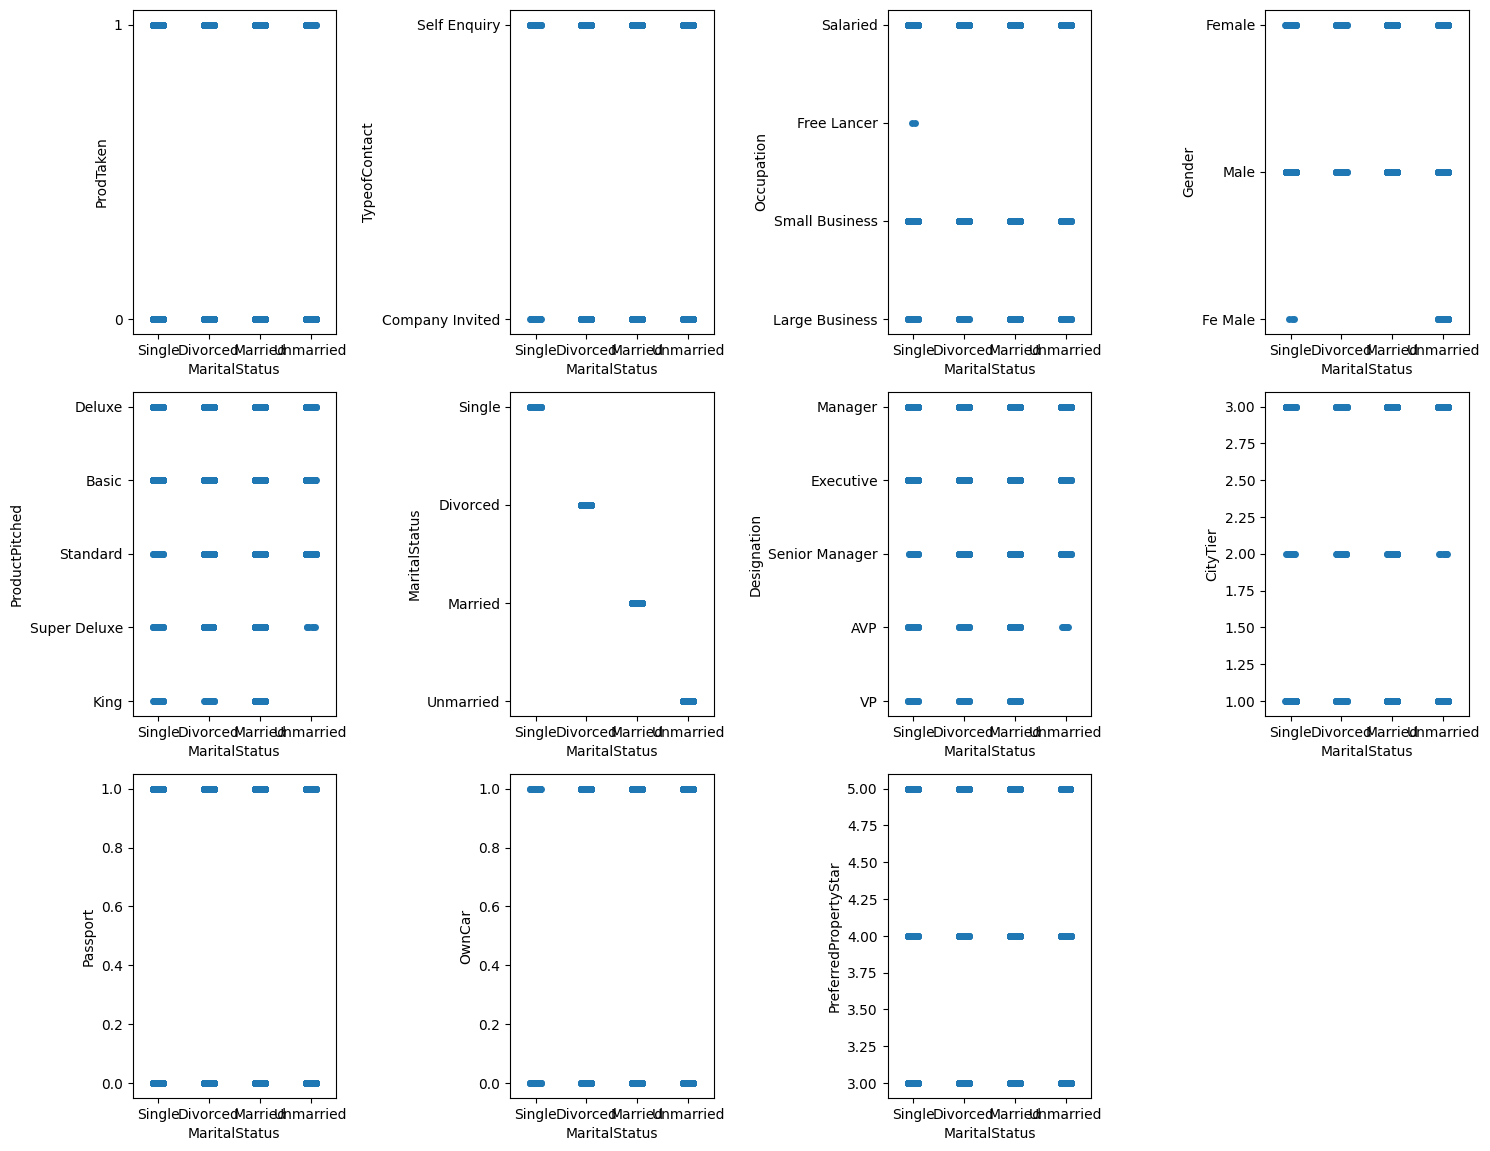

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='MaritalStatus', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

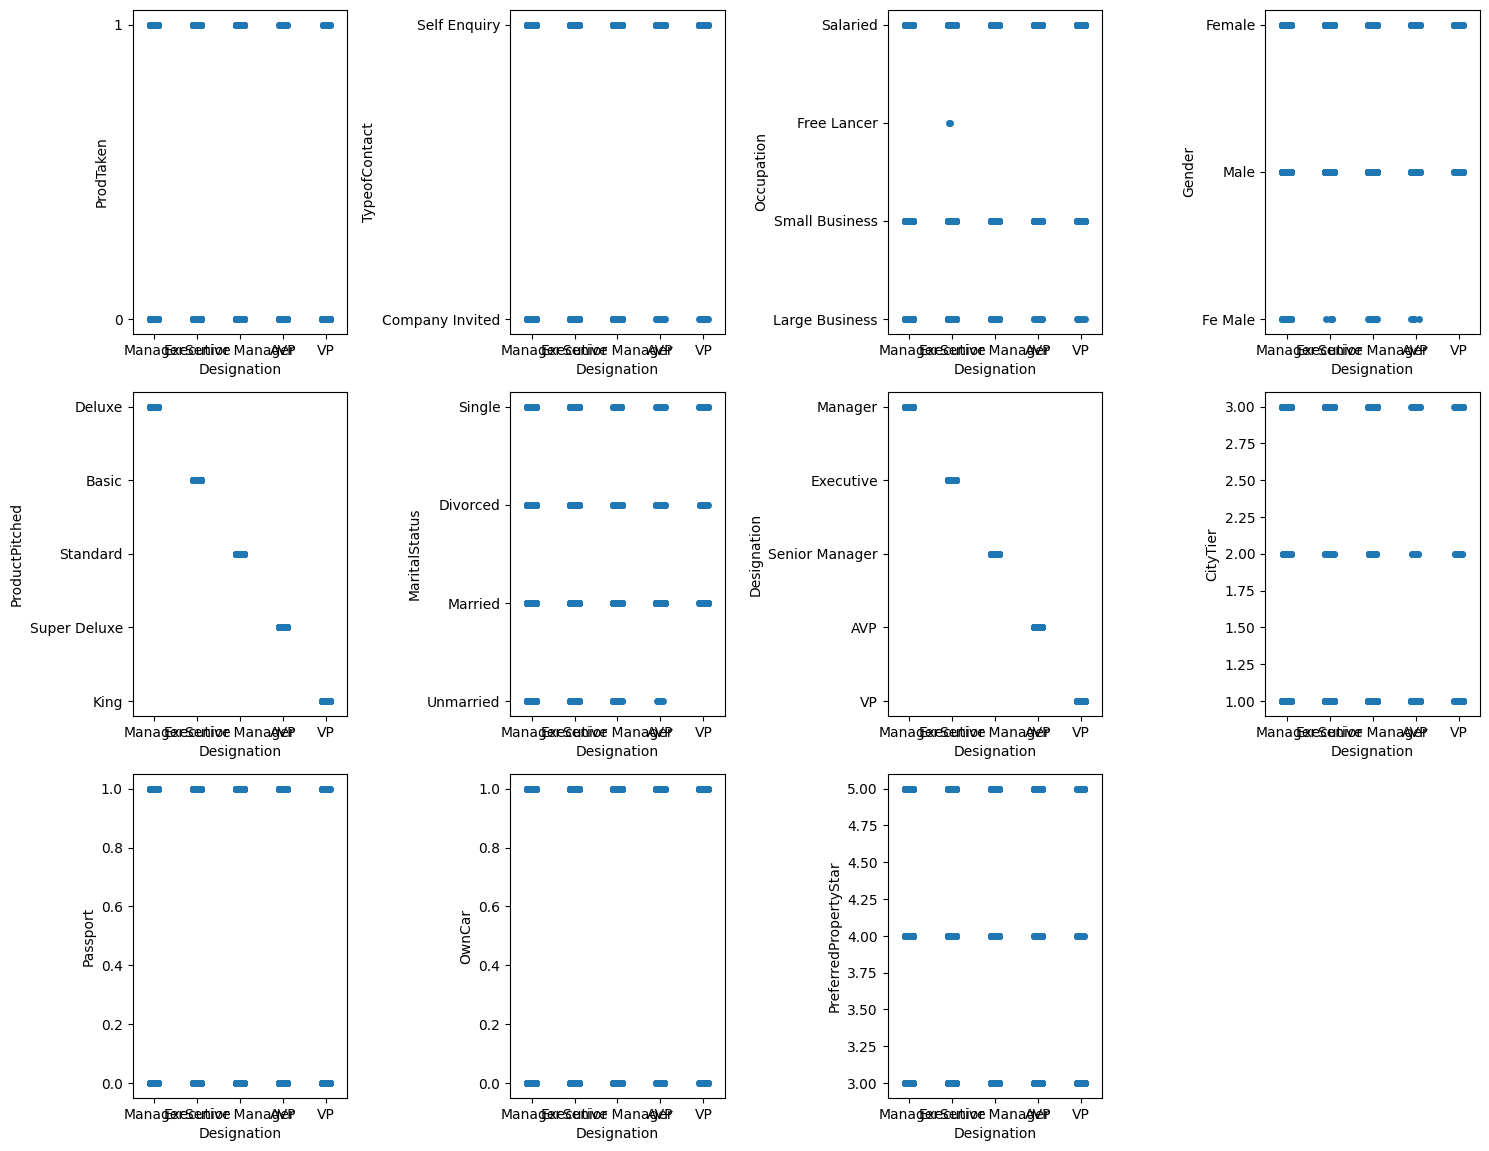

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(categorical_columns)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data2, x='Designation', y=categorical_columns[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

Beberapa pasangan fitur memiliki korelasi mendekati nol, yang menunjukkan ketidakterhubungan antara mereka. Contoh yang mencolok adalah "DurationOfPitch" dengan "Gender" dan "MaritalStatus" dengan "Passport." Hal ini menunjukkan bahwa perubahan dalam salah satu fitur tidak secara signifikan mempengaruhi fitur lainnya.

## 4. Business Insight

### a. Business Insight 1

In [ ]:
# Produk apa yang paling banyak dibeli? (dalam persentase)
df_product = df.groupby(['ProductPitched', 'ProdTaken'])['CustomerID'].count().reset_index(name='TotalCust')\
        .merge(df.groupby(['ProductPitched'])['CustomerID'].count(),on = 'ProductPitched')
df_product = df_product[df_product.ProdTaken==1].reset_index(drop=True)
df_product['%']=round(df_product.TotalCust/df_product.CustomerID*100,2)
df_product = df_product.sort_values(by='%',ascending=False)
df_product

ProductPitched ProdTaken  TotalCust  CustomerID      %
0          Basic         1        552        1842  29.97
3       Standard         1        124         742  16.71
1         Deluxe         1        204        1732  11.78
2           King         1         20         230   8.70
4   Super Deluxe         1         20         342   5.85

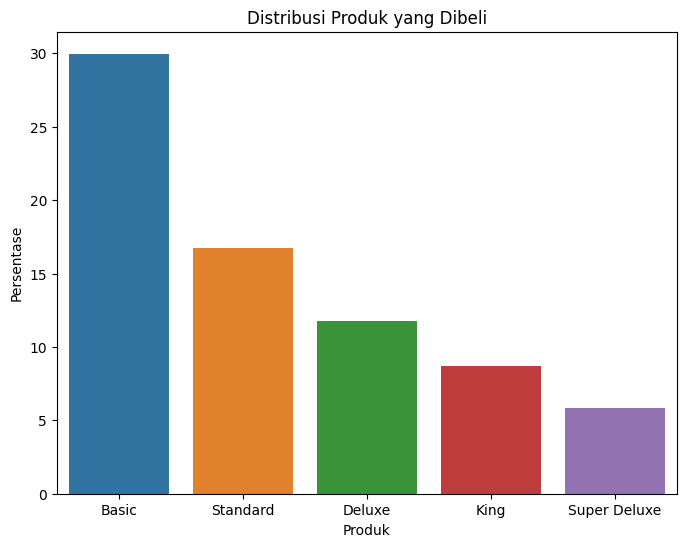

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=df_product, x="ProductPitched", y="%")
plt.title("Distribusi Produk yang Dibeli")
plt.xlabel("Produk")
plt.ylabel("Persentase")
plt.show()

Insight :
- terlihat bahwa produk "Basic" adalah produk yang paling banyak dibeli dalam persentase dibandingkan dengan produk lainnya.
Produk "Basic" memiliki persentase pembelian yang tinggi dibandingkan dengan produk lainnya.

Rekomendasi Bisnis:
- Fokus pemasaran: Perusahaan dapat mempertimbangkan untuk lebih fokus dalam pemasaran produk "Basic," karena produk ini paling banyak diminati oleh pelanggan. Ini dapat membantu meningkatkan penjualan.
- Penawaran khusus: Perusahaan juga dapat mencoba menawarkan penawaran khusus atau promosi terkait dengan produk "Basic" untuk menarik lebih banyak pelanggan.

### b. Business Insight 2

In [ ]:
df_maritalstatus = df.groupby(['MaritalStatus', 'ProdTaken'])['CustomerID'].count().reset_index()
df_maritalstatus.columns = ['MaritalStatus', 'ProdTaken', 'Count']

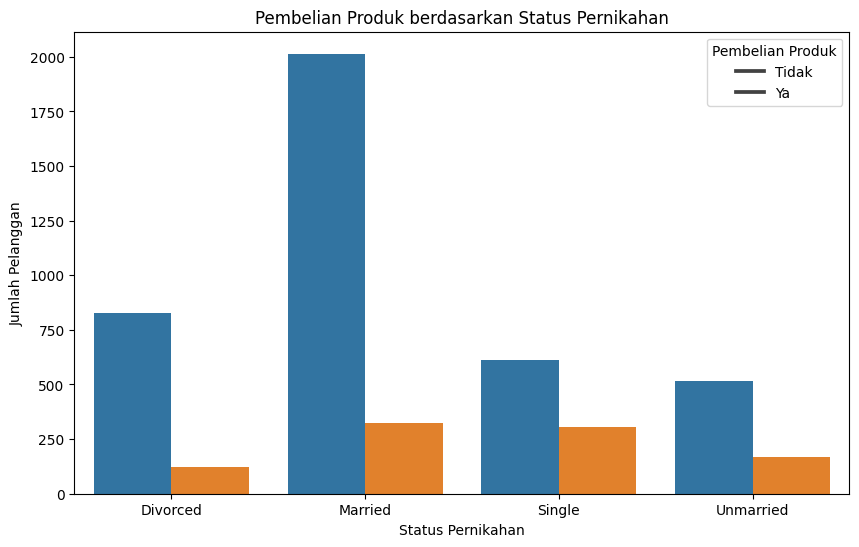

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='Count', hue='ProdTaken', data=df_maritalstatus)

plt.title("Pembelian Produk berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Pelanggan")

plt.legend(title="Pembelian Produk", labels=["Tidak", "Ya"])

plt.show()

Insight:
Pelanggan yang married memiliki tingkat pembelian produk yang lebih tinggi dibandingkan dengan pelanggan yang single, divorced dan unmarried
Hal tersebut mengindikasikan bahwa pelanggan yang married lebih terbuka terhadap produk baru yang akan ditawarkan serta lebih mungkin melakukan pembelian.

Rekomendasi Bisnis:
Perusahaan dapat mempertimbangkan untuk melakukan upaya promosi yang lebih besar kepada pelanggan yang married, seperti paket keluarga.



### c. Business Insight 3

In [ ]:
# Apakah orang yang memiliki paspor cenderung membeli produk?
df_passport = df.groupby(['Passport','ProdTaken']).CustomerID.count().reset_index()\
        .merge(df.groupby(['Passport']).CustomerID.count(),on='Passport')
df_passport['%']=round(df_passport.CustomerID_x/df_passport.CustomerID_y*100,2)
df_passport = df_passport[df_passport.ProdTaken==1].sort_values(by='%',ascending=False).reset_index(drop=True)
df_passport

Passport ProdTaken  CustomerID_x  CustomerID_y      %
0        1         1           494          1422  34.74
1        0         1           426          3466  12.29

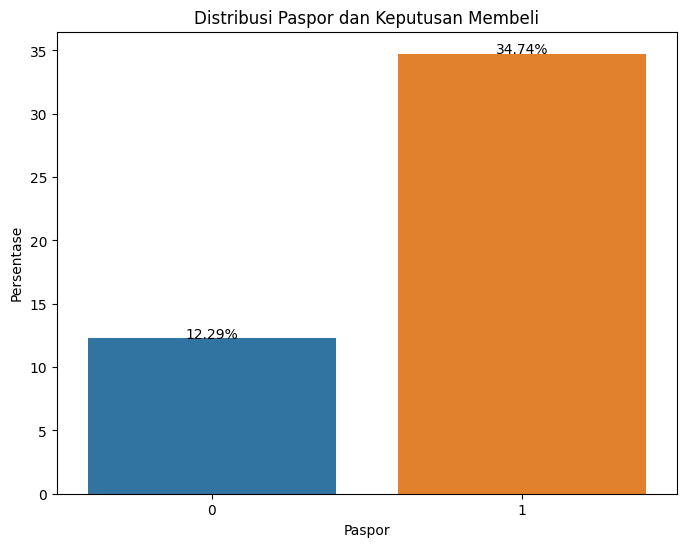

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_passport, x="Passport", y="%")
plt.title("Distribusi Paspor dan Keputusan Membeli")
plt.xlabel("Paspor")
plt.ylabel("Persentase")

# Menambahkan persentase
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

Insight:
- Terlihat bahwa orang yang memiliki paspor (Passport = 1) cenderung lebih cenderung membeli produk (ProdTaken = 1) dibandingkan dengan mereka yang tidak memiliki paspor (Passport = 0). Proporsi pelanggan yang memiliki paspor dan membeli produk lebih tinggi dibandingkan dengan pelanggan yang tidak memiliki paspor.

Rekomendasi Bisnis:
- Perusahaan dapat memberikan penawaran atau promosi khusus kepada pelanggan yang memiliki paspor sebagai insentif untuk membeli produk.

# Stage 2: Data Pre-Processing

## 1. Data Cleansing

In [ ]:
# Copy dataframe for data preprocessing
df_prep = df.copy()

### A. Handle missing values

Mengapa handle missing values itu penting?
- Mengatasi missing values (nilai yang hilang) dalam data sangat penting karena nilai yang hilang tersebut dapat memiliki dampak yang signifikan pada analisis data dan pengambilan keputusan.

Bagaimana persentase missing value pada masing-masing kolom?

In [ ]:
# Hitung Missing Values
missing_data = df_prep.isnull().sum()

# Hitung Total Data
total_data = df_prep.shape[0]

# Hitung Persentase missing values setiap kolom
percentage_missing = (missing_data / total_data) * 100
percentage_missing

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

Masing-masing kolom yang terdapat missing value memiliki persentase yang kecil (5% atau kurang). Sehingga salah satu cara untuk mengatasi missing value tersebut adalah dengan melakukan imputasi.

Data yang missing value dapat diisi dengan:
1. Nilai Mean: <br> Digunakan pada data dengan nilai numerik dan berdistribusi normal, karena distribusi yang simetris/normal berarti bahwa rata-rata dan median sangat dekat satu sama lain.
2. Nilai Median: <br> Digunakan pada data dengan nilai numerik dan distribusi skew, karena median kurang sensitif terhadap nilai-nilai ekstrem atau outlier dan memberikan gambaran yang lebih baik tentang pusat distribusi dalam kasus distribusi yang tidak simetris.
3. Nilai Modus: <br> Digunakan pada data dengan nilai kategorik

In [ ]:
# Handling missing value numeric_columns

# Imputasi kolom numerikal dengan nilai rata-rata
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep['NumberOfFollowups'].fillna(df_prep['NumberOfFollowups'].mean(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(df_prep['NumberOfChildrenVisiting'].mean(), inplace=True)

# Imputasi kolom numerikal dengan nilai median
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [ ]:
# Handling missing value categorical_columns
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df_prep['TypeofContact'].fillna(df_prep['TypeofContact'].mode()[0], inplace=True)
df_prep['PreferredPropertyStar'].fillna(df_prep['PreferredPropertyStar'].mode()[0], inplace=True)

In [ ]:
df_prep.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Terlihat bahwa semua missing values telah berhasil dihandle

### B. Handle duplicated data

Handle Duplicated Data sangat penting karena data duplikasi dapat mempengaruhi akurasi data serta mengganggu efisiensi sistem pengolahan data.  Selain itu, data duplikasi juga dapat memengaruhi analisis data serta memengaruhi pengambilan keputusan yang tepat.
Menghandle duplikasi data meningkatkan akurasi, efisiensi, keamanan, dan kemampuan organisasi/perusahaan untuk mengambil keputusan berdasarkan data yang tepat dan bersih.

Mengecek apakah dalam dataframe terdapat duplikasi

In [ ]:
#mengecek duplikat
duplicate_rows = df_prep[df_prep.duplicated(keep='first')]

if duplicate_rows.empty:
    print("Tidak ada baris duplikat dalam DataFrame.")
else:
    print("Baris Duplikat:")
    print(duplicate_rows)

Tidak ada baris duplikat dalam DataFrame.


Diketahui dalam dataframe tidak terdapat duplikasi data, sehingga menghandle kesalahan pada kolom Gender (Fe Male digabungkan ke Female), serta handle kolom MaritalStatus (Unmarried digabungkan ke Single)

In [ ]:
def fix_gender(gender):
    if gender == 'Fe Male':
        return 'Female'
    return gender

df_prep['Gender'] = df_prep['Gender'].apply(fix_gender)

df_prep['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

Pada kolom Gender, terdapat kesalahan input yaitu 'Fe Male'. Sedangkan terdapat juga jawaban 'Female' sehingga untuk mencegah duplikat data 'Fe Male' digabungkan ke 'Female'

In [ ]:
def fix_marital_status(status):
    if status == 'Unmarried':
        return 'Single'
    return status

df_prep['MaritalStatus'] = df_prep['MaritalStatus'].apply(fix_marital_status)

df_prep['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

Pada kolom MaritalStatus, terdapat data yang tidak konsisten yaitu Unmarried, sehingga Unmarried digabungkan ke Single karena keduanya merujuk kepada istilah yang sama, yaitu lajang

### C. Handle outliers

Dari EDA yang sudah dilakukan pada minggu sebelumnya, diketahui bahwa kolom DurationOfPitch, NumberOfTrips, MonthlyIncome memiliki outliers yang harus diatasi/handle. Outliers dapat memengaruhi performa model statistik atau machine learning, sehingga mengatasi outliers adalah langkah yang penting dalam menghasilkan output yang lebih akurat dan konsisten.

In [ ]:
# Log transform kolom MonthlyIncome
df_prep['MonthlyIncome'] = np.log1p(df_prep['MonthlyIncome'])

Kolom MonthlyIncome memiliki distribusi yang kemiringannya (skew) cukup signifikan, maka dilakukan log-transform agar distribusinya lebih simetris.

In [ ]:
# Identifikasi outliers
z_scores = np.abs(stats.zscore(df_prep[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']]))
outliers_low = (z_scores < -3).any(axis=1)  # Ambang batas bawah -3
outliers_high = (z_scores > 3).any(axis=1)  # Ambang batas atas 3

Mengidentifikasi outliers menggunakan metode z-score karena z-score adalah salah satu cara yang umum digunakan untuk mengukur sejauh mana suatu nilai berbeda dari rata-rata dalam distribusi data.

Kemudian menetapkan outliers rendah dan tinggi sebagai acuan dalam meng-handle outliers.

In [ ]:
# Ganti outliers dengan nilai batas bawah atau atas yang belum termasuk outlier
lower_bound = df_prep[~outliers_low].min()
upper_bound = df_prep[~outliers_high].max()

df_prep['DurationOfPitch'].loc[outliers_low] = lower_bound['DurationOfPitch']
df_prep['DurationOfPitch'].loc[outliers_high] = upper_bound['DurationOfPitch']

df_prep['NumberOfTrips'].loc[outliers_low] = lower_bound['NumberOfTrips']
df_prep['NumberOfTrips'].loc[outliers_high] = upper_bound['NumberOfTrips']

df_prep['MonthlyIncome'].loc[outliers_low] = lower_bound['MonthlyIncome']
df_prep['MonthlyIncome'].loc[outliers_high] = upper_bound['MonthlyIncome']

Mengidentifikasi batas bawah dan batas atas yang belum termasuk outlier. Kemudian mengganti nilai outliers dengan ketentuan sebagai berikut:
*   Nilai outliers rendah diganti menjadi nilai batas bawah yang belum termasuk outlier.
*   Nilai outliers tinggi diganti menjadi nilai batas atas yang belum termasuk outlier.

Alasan menerapkan ketentuan di atas yaitu:
*   Membuat data lebih konsisten dan mengurangi dampak ekstrem yang dapat mempengaruhi statistik atau model.
*   Tetap mempertahankan data yang tidak termasuk outliers agar informasi asli dalam data tidak hilang sepenuhnya.
*   Meminimalkan risiko mengenai apakah outliers benar-benar adalah kesalahan atau kejadian langka yang valid. Dengan mengganti dengan nilai batas bawah dan batas atas, kita tidak kehilangan data potensial yang valid.

In [ ]:
df_prep.describe()

CustomerID          Age  DurationOfPitch  NumberOfPersonVisiting  \
count    4888.000000  4888.000000      4888.000000             4888.000000   
mean   202443.500000    37.622265        15.365589                2.905074   
std      1411.188388     9.098418         8.058839                0.724891   
min    200000.000000    18.000000         5.000000                1.000000   
25%    201221.750000    31.000000         9.000000                2.000000   
50%    202443.500000    37.000000        13.000000                3.000000   
75%    203665.250000    43.000000        19.000000                3.000000   
max    204887.000000    61.000000        36.000000                5.000000   

       NumberOfFollowups  NumberOfTrips  PitchSatisfactionScore  \
count        4888.000000    4888.000000             4888.000000   
mean            3.708445       3.225450                3.078151   
std             0.997882       1.766822                1.365792   
min             1.000000       1.000000                1.000000   
25%             3.000000       2.000000                2.000000   
50%             4.000000       3.000000                3.000000   
75%             4.000000       4.000000                4.000000   
max             6.000000       8.000000                5.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4888.000000    4888.000000  
mean                   1.187267      10.046808  
std                    0.852049       0.200980  
min                    0.000000       9.680969  
25%                    1.000000       9.927643  
50%                    1.000000      10.014492  
75%                    2.000000      10.144481  
max                    3.000000      10.563026

Setelah handling outliers, dapat dilihat nilai-nilai statistik pada kolom yang ditangani menjadi lebih stabil.

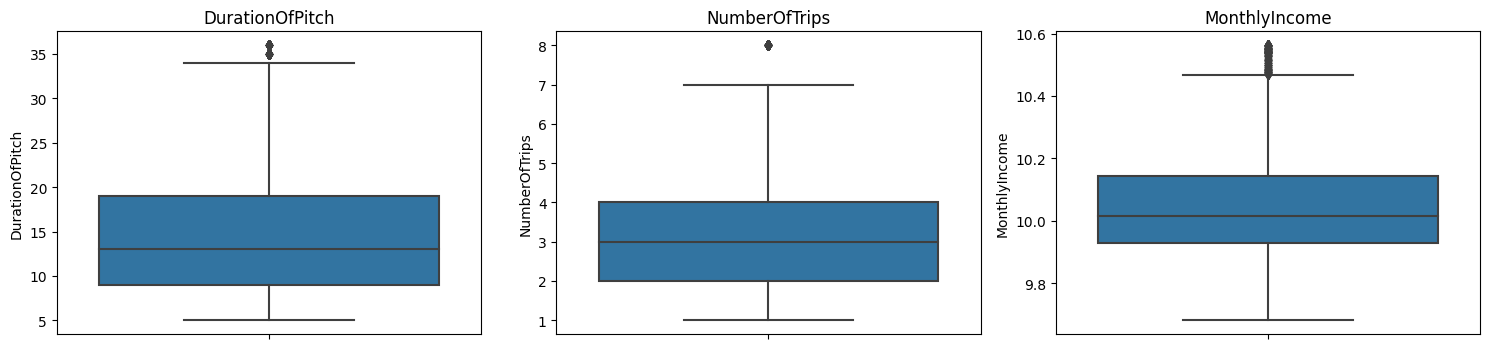

In [ ]:
plt.figure(figsize=(15, 10))

columns_outliers = ["DurationOfPitch", "NumberOfTrips", "MonthlyIncome"]

for index, column in enumerate(columns_outliers, 1):
    plt.subplot(3, 3, index)
    sns.boxplot(y=df_prep[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Terlihat pada boxplot di atas, outlier telah berhasil diatasi.

### D. Feature transformation

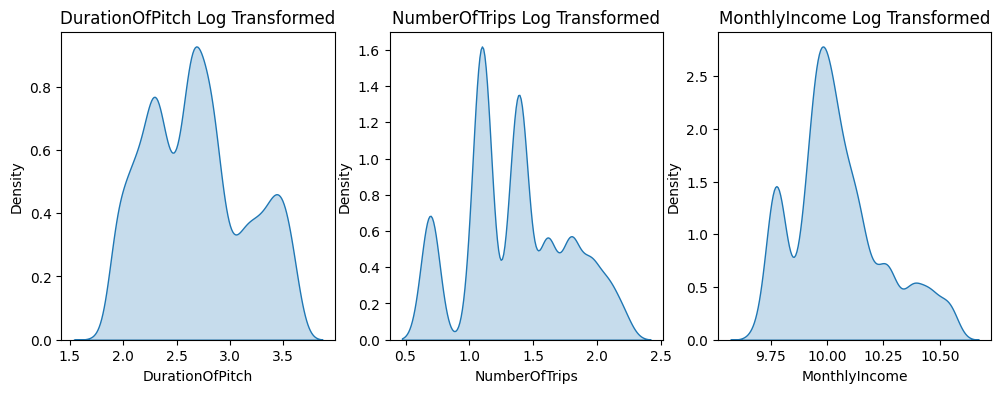

In [ ]:
# Log Transform pada DurationOfPitch, NumberOfTrips
df_prep['DurationOfPitch'] = np.log1p(df_prep['DurationOfPitch'])
df_prep['NumberOfTrips'] = np.log1p(df_prep['NumberOfTrips'])
# df_prep['MonthlyIncome'] = np.log1p(df_prep['MonthlyIncome'])

# Plot distribusi data setelah transformasi log
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.kdeplot(df_prep['DurationOfPitch'], shade=True)
plt.title('DurationOfPitch Log Transformed')

plt.subplot(132)
sns.kdeplot(df_prep['NumberOfTrips'], shade=True)
plt.title('NumberOfTrips Log Transformed')

plt.subplot(133)
sns.kdeplot(df_prep['MonthlyIncome'], shade=True)
plt.title('MonthlyIncome Log Transformed')

plt.show()

Transformasi fitur logaritma (log transform) adalah teknik yang berguna untuk mengatasi distribusi data yang cenderung condong (skewed) dan untuk mengurangi efek outlier. Pada dataset kami dilakukan Log Transform pada DurationOfPitch, NumberOfTrips, yang dimana log transformation itu digunakan pada data yang right-skewed setelah dilakukan feature transformation maka distribusi hasil transformasi akan mendekati distribusi normal jika dilihat dari hasil grafik tersebut.

In [ ]:
scaler = StandardScaler()
df_prep[numeric_columns] = scaler.fit_transform(df_prep[numeric_columns])

df_prep.head()

CustomerID ProdTaken           Age    TypeofContact CityTier  \
0      200000         1  3.712822e-01     Self Enquiry        3   
1      200001         0  1.250646e+00  Company Invited        1   
2      200002         1 -6.839967e-02     Self Enquiry        1   
3      200003         0 -5.080815e-01  Company Invited        1   
4      200004         0 -7.810318e-16     Self Enquiry        1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0        -1.583905        Salaried  Female                0.130966   
1         0.052012        Salaried    Male                0.130966   
2        -1.044464     Free Lancer    Male                0.130966   
3        -0.818310        Salaried  Female               -1.248694   
4        -1.044464  Small Business    Male               -1.248694   

   NumberOfFollowups ProductPitched PreferredPropertyStar MaritalStatus  \
0          -0.710021         Deluxe                   3.0        Single   
1           0.292203         Deluxe                   4.0      Divorced   
2           0.292203          Basic                   3.0        Single   
3          -0.710021          Basic                   3.0      Divorced   
4          -0.710021          Basic                   4.0      Divorced   

   NumberOfTrips Passport  PitchSatisfactionScore OwnCar  \
0      -1.650977        1               -0.789477      1   
1      -0.645491        0               -0.057226      1   
2       1.786803        1               -0.057226      0   
3      -0.645491        1                1.407276      1   
4      -1.650977        0                1.407276      1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                 -1.393568     Manager      -0.471815  
1                  0.953955     Manager      -0.680692  
2                 -1.393568   Executive      -1.495327  
3                 -0.219807   Executive      -1.262409  
4                 -1.393568   Executive      -1.109470

Kemudian dilanjutkan penggunaan StandardScaler dari scikit-learn untuk melakukan standarisasi pada kolom numerik dalam DataFrame yang disebut df_prep. Standarisasi mengubah data sehingga memiliki rata-rata 0 dan deviasi standar 1.
- ProdTaken: Menunjukkan apakah pelanggan atau prospek telah membeli produk (1) atau belum (0).
- Passport: Menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
- OwnCar: Menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).

In [ ]:
df_prep.describe()

CustomerID           Age  DurationOfPitch  NumberOfPersonVisiting  \
count    4888.000000  4.888000e+03     4.888000e+03            4.888000e+03   
mean   202443.500000 -4.884254e-16    -1.976960e-16            1.860668e-16   
std      1411.188388  1.000102e+00     1.000102e+00            1.000102e+00   
min    200000.000000 -2.156888e+00    -1.914787e+00           -2.628353e+00   
25%    201221.750000 -7.279224e-01    -8.183100e-01           -1.248694e+00   
50%    202443.500000 -6.839967e-02    -9.607928e-02            1.309661e-01   
75%    203665.250000  5.911231e-01     6.695161e-01            1.309661e-01   
max    204887.000000  2.569691e+00     1.989999e+00            2.890285e+00   

       NumberOfFollowups  NumberOfTrips  PitchSatisfactionScore  \
count       4.888000e+03   4.888000e+03            4.888000e+03   
mean       -9.303342e-17   2.325835e-16           -9.303342e-17   
std         1.000102e+00   1.000102e+00            1.000102e+00   
min        -2.714470e+00  -1.650977e+00           -1.521728e+00   
25%        -7.100212e-01  -6.454906e-01           -7.894768e-01   
50%         2.922034e-01   6.791324e-02           -5.722583e-02   
75%         2.922034e-01   6.212723e-01            6.750251e-01   
max         2.296653e+00   2.078886e+00            1.407276e+00   

       NumberOfChildrenVisiting  MonthlyIncome  
count              4.888000e+03   4.888000e+03  
mean               4.651671e-17  -8.838175e-16  
std                1.000102e+00   1.000102e+00  
min               -1.393568e+00  -1.820459e+00  
25%               -2.198065e-01  -5.929762e-01  
50%               -2.198065e-01  -1.608067e-01  
75%                9.539554e-01   4.860329e-01  
max                2.127717e+00   2.568765e+00

- CustomerID: ID pelanggan atau prospek, dengan jumlah data sebanyak 4,888. Rentang ID mulai dari 200,000 hingga 204,887.
- ProdTaken: Sebagian besar pelanggan (sekitar 18,8%) telah mengambil produk (nilai rata-rata sekitar 0,19). Nilai minimum adalah 0 (belum mengambil produk), dan nilai maksimum adalah 1 (mengambil produk).
- Age: Usia pelanggan atau prospek yang telah dinormalisasi. Data telah diubah sehingga rata-ratanya mendekati 0 dan deviasi standarnya mendekati 1.
- CityTier: Tingkat kota tempat pelanggan atau prospek berada. Nilai-nilai rentang dari 1 hingga 3.
- DurationOfPitch: Durasi dari presentasi penjualan yang telah dinormalisasi.
- NumberOfPersonVisiting: Jumlah orang yang mengunjungi bersama pelanggan. Data juga telah dinormalisasi.
- NumberOfFollowups: Jumlah tindak lanjut yang telah dilakukan oleh perusahaan terhadap pelanggan.
- PreferredPropertyStar: Bintang properti yang diinginkan oleh pelanggan, dengan rentang nilai 3 hingga 4.
- NumberOfTrips: Jumlah perjalanan yang telah diambil oleh pelanggan.
- Passport: Menunjukkan apakah pelanggan memiliki paspor (1) atau tidak (0).
- PitchSatisfactionScore: Skor kepuasan presentasi penjualan. Skor ini telah dinormalisasi.
- OwnCar: Menunjukkan apakah pelanggan memiliki mobil (1) atau tidak (0).
- NumberOfChildrenVisiting: Jumlah anak yang mengunjungi bersama pelanggan. Data juga telah dinormalisasi.
- MonthlyIncome: Pendapatan bulanan pelanggan atau prospek yang telah dinormalisasi.

### E. Feature encoding

In [ ]:
# Membuat kolom kategori untuk kolom kategorikal
categorical_columns = df_prep.select_dtypes(include='object').columns
categorical_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [ ]:
# Iterasi untuk melihat unique values dan value counts
for col in categorical_columns:
    unique_values = df_prep[col].unique()
    value_counts = df_prep[col].value_counts()
    print(f'{col} : {unique_values.tolist()}')
    print(value_counts)
    print('------------------------------------------')

TypeofContact : ['Self Enquiry', 'Company Invited']
Self Enquiry       3469
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------------------
Occupation : ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------------------
Gender : ['Female', 'Male']
Male      2916
Female    1972
Name: Gender, dtype: int64
------------------------------------------
ProductPitched : ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------------------
MaritalStatus : ['Single', 'Divorced', 'Married']
Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64
------------------------------------------
Designation : ['Ma

***Kesimpulan***

1. `Gender` memiliki dua nilai unik ('Female' dan 'Male'), sehingga kita dapat gunakan Label Encoding untuk mengubah nilai-nilai ini menjadi angka (0 dan 1).
   
2. `ProductPitched` dan `Designation` memiliki nilai yang berjenis data ordinal, sehingga kita dapat menggunakan Label Encoding untuk mengubah nilai-nilai ini menjadi angka sesuai urutannya.

3. `TypeofContact`, `Occupation` dan `MaritalStatus` memiliki lebih dari dua nilai unik dan jenis datanya tidak ordinal. Maka akan di lakukan One Hot Encoding.

4. `Occupation` terdapat pelanggan dengan value Free Lancer dengan jumlah 2, untuk saat ini akan dipertahankan.

In [ ]:
# One hot encoding TypeofContact, Occupation and MaritalStatus

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_columns = ['TypeofContact', 'Occupation', 'MaritalStatus']

encoded_columns = pd.DataFrame()

for column in onehot_columns:
    encoded = onehot_encoder.fit_transform(df_prep[[column]])
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{category}" for category in onehot_encoder.categories_[0]])
    encoded_columns = pd.concat([encoded_columns, encoded_df], axis=1)

df_prep = pd.concat([df_prep, encoded_columns], axis=1)
df_prep.drop(onehot_columns, axis=1, inplace=True)

In [ ]:
# Label encoding Gender
df_prep['Gender'] = df_prep['Gender'].map({'Female':0, 'Male':1})
df_prep['Gender'].unique()

array([0, 1])

In [ ]:
# Label encoding ProductPitched
df_prep['ProductPitched'] = df_prep['ProductPitched'].map({'Basic':0, 'Standard':1, 'Deluxe':2,
                                                           'Super Deluxe':3, 'King':4})
df_prep['ProductPitched'].unique()

array([2, 0, 1, 3, 4])

In [ ]:
# Label encoding Designation
df_prep['Designation'] = df_prep['Designation'].map({'Executive':0, 'Manager':1, 'Senior Manager':2,
                                                     'AVP':3, 'VP':4})
df_prep['Designation'].unique()

array([1, 0, 2, 3, 4])

In [ ]:
pd.set_option('display.max_columns', 50)
df_prep

CustomerID ProdTaken           Age CityTier  DurationOfPitch  Gender  \
0         200000         1  3.712822e-01        3        -1.583905       0   
1         200001         0  1.250646e+00        1         0.052012       1   
2         200002         1 -6.839967e-02        1        -1.044464       1   
3         200003         0 -5.080815e-01        1        -0.818310       0   
4         200004         0 -7.810318e-16        1        -1.044464       1   
...          ...       ...           ...      ...              ...     ...   
4883      204883         1  1.250646e+00        3        -0.818310       1   
4884      204884         1 -1.057684e+00        1         1.678369       1   
4885      204885         1  1.580407e+00        3         0.443362       0   
4886      204886         1 -2.046968e+00        3         0.320673       1   
4887      204887         1 -1.783201e-01        1         0.052012       1   

      NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                   0.130966          -0.710021               2   
1                   0.130966           0.292203               2   
2                   0.130966           0.292203               0   
3                  -1.248694          -0.710021               0   
4                  -1.248694          -0.710021               0   
...                      ...                ...             ...   
4883                0.130966           1.294428               2   
4884                1.510626           1.294428               0   
4885                1.510626           0.292203               1   
4886                0.130966           0.292203               0   
4887                1.510626           0.292203               0   

     PreferredPropertyStar  NumberOfTrips Passport  PitchSatisfactionScore  \
0                      3.0      -1.650977        1               -0.789477   
1                      4.0      -0.645491        0               -0.057226   
2                      3.0       1.786803        1               -0.057226   
3                      3.0      -0.645491        1                1.407276   
4                      4.0      -1.650977        0                1.407276   
...                    ...            ...      ...                     ...   
4883                   4.0      -0.645491        1               -1.521728   
4884                   3.0       0.067913        1               -0.057226   
4885                   4.0       1.786803        0               -1.521728   
4886                   3.0       0.067913        0                1.407276   
4887                   4.0       0.067913        1               -0.057226   

     OwnCar  NumberOfChildrenVisiting  Designation  MonthlyIncome  \
0         1                 -1.393568            1      -0.471815   
1         1                  0.953955            1      -0.680692   
2         0                 -1.393568            0      -1.495327   
3         1                 -0.219807            0      -1.262409   
4         1                 -1.393568            0      -1.109470   
...     ...                       ...          ...            ...   
4883      1                 -0.219807            1       0.701602   
4884      1                  0.953955            0      -0.420175   
4885      1                  2.127717            2       1.597703   
4886      0                  0.953955            0      -0.641543   
4887      1                  0.953955            0       0.202776   

      TypeofContact_Company Invited  TypeofContact_Self Enquiry  \
0                               0.0                         1.0   
1                               1.0                         0.0   
2                               0.0                         1.0   
3                               1.0                         0.0   
4                               0.0                         1.0   
...                             ...                         ...   
4883                         

Terlihat hasilnya fitur encoding telah berhasil dilakukan.

### F. Handle class imbalance

Dalam banyak aplikasi pemodelan, terutama yang berkaitan dengan klasifikasi, seringkali kita menemui masalah dimana satu kelas memiliki jumlah sampel yang jauh lebih banyak dibandingkan kelas lain. Situasi ini dikenal sebagai ketidakseimbangan kelas. Menggunakan data yang tidak seimbang untuk pelatihan model dapat mengakibatkan kinerja model yang buruk, terutama dalam mengidentifikasi kelas minoritas.

Sebagai solusi, salah satu teknik yang dapat digunakan adalah oversampling dengan SMOTE (Synthetic Minority Over-sampling Technique). Teknik ini menghasilkan sampel sintetis dari kelas minoritas dengan cara mengambil interpolasi antara sampel-sampel yang ada. Ini membantu dalam meningkatkan jumlah sampel pada kelas minoritas hingga setara dengan kelas mayoritas, sehingga mengatasi ketidakseimbangan.

In [ ]:
X = df_prep.drop(["ProdTaken", "CustomerID"], axis=1)
y = df_prep["ProdTaken"]

X_smote, y_smote = SMOTE(random_state=42).fit_resample(X, y)
y_smote.value_counts()

0    3968
1    3968
Name: ProdTaken, dtype: int64

Hasil dari proses ini menunjukkan bahwa kedua kelas (1 dan 0) sekarang masing-masing memiliki 3968 sampel, menunjukkan bahwa ketidakseimbangan kelas telah diatasi.

## 2. Feature Engineering

### A. Feature selection

- Fitur CustomerID mungkin tidak memberikan informasi yang signifikan untuk model dan dapat dihapus.
- Mengingat korelasi tinggi antara NumberOfPersonVisiting dan NumberOfChildrenVisiting, kita mungkin ingin mempertimbangkan untuk menghapus salah satu dari mereka. Namun, untuk saat ini, kita akan mempertahankannya dan memutuskannya setelah evaluasi model.

In [ ]:
df_prep = df_prep.drop('CustomerID', axis=1, errors='ignore')
df_prep.head()

ProdTaken           Age CityTier  DurationOfPitch  Gender  \
0         1  3.712822e-01        3        -1.583905       0   
1         0  1.250646e+00        1         0.052012       1   
2         1 -6.839967e-02        1        -1.044464       1   
3         0 -5.080815e-01        1        -0.818310       0   
4         0 -7.810318e-16        1        -1.044464       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                0.130966          -0.710021               2   
1                0.130966           0.292203               2   
2                0.130966           0.292203               0   
3               -1.248694          -0.710021               0   
4               -1.248694          -0.710021               0   

  PreferredPropertyStar  NumberOfTrips Passport  PitchSatisfactionScore  \
0                   3.0      -1.650977        1               -0.789477   
1                   4.0      -0.645491        0               -0.057226   
2                   3.0       1.786803        1               -0.057226   
3                   3.0      -0.645491        1                1.407276   
4                   4.0      -1.650977        0                1.407276   

  OwnCar  NumberOfChildrenVisiting  Designation  MonthlyIncome  \
0      1                 -1.393568            1      -0.471815   
1      1                  0.953955            1      -0.680692   
2      0                 -1.393568            0      -1.495327   
3      1                 -0.219807            0      -1.262409   
4      1                 -1.393568            0      -1.109470   

   TypeofContact_Company Invited  TypeofContact_Self Enquiry  \
0                            0.0                         1.0   
1                            1.0                         0.0   
2                            0.0                         1.0   
3                            1.0                         0.0   
4                            0.0                         1.0   

   Occupation_Free Lancer  Occupation_Large Business  Occupation_Salaried  \
0                     0.0                        0.0                  1.0   
1                     0.0                        0.0                  1.0   
2                     1.0                        0.0                  0.0   
3                     0.0                        0.0                  1.0   
4                     0.0                        0.0                  0.0   

   Occupation_Small Business  MaritalStatus_Divorced  MaritalStatus_Married  \
0                        0.0                     0.0                    0.0   
1                        0.0                     1.0                    0.0   
2                        0.0                     0.0                    0.0   
3                        0.0                     1.0                    0.0   
4                        1.0                     1.0                    0.0   

   MaritalStatus_Single  
0                   1.0  
1                   0.0  
2                   1.0  
3                   0.0  
4                   0.0

Terlihat pada dataframe di atas, langkah feature selection telah berhasil dilakukan.

### B. Feature extraction

Fitur tambahan yang akan dibuat:
1. TotalFamilySize: TotalFamilySize menggambarkan jumlah total individu dalam sebuah keluarga yang melakukan kunjungan.

  Saat berpergian, ukuran keluarga dapat mempengaruhi banyak hal, mulai dari pilihan akomodasi hingga jenis aktivitas yang dipilih. Keluarga yang lebih besar mungkin membutuhkan akomodasi yang lebih luas atau lebih cenderung mengunjungi tempat-tempat yang ramah anak. Oleh karena itu, memiliki gambaran tentang ukuran total keluarga dapat membantu dalam analisis perilaku pelanggan dan perencanaan strategis.

2. PitchEfficiency: PitchEfficiency mengukur efisiensi dari setiap "pitch" atau presentasi dengan membandingkan durasi presentasi dengan jumlah tindak lanjut yang diterima.

  Efisiensi pitch dapat memberi tahu kita seberapa cepat presentasi menghasilkan tindak lanjut atau respons. Sebuah pitch yang efisien mungkin mengindikasikan bahwa informasi disampaikan dengan jelas dan menarik, sedangkan pitch yang kurang efisien mungkin memerlukan perbaikan dalam penyampaian atau kontennya.

3. AgeGroup: AgeGroup membagi individu ke dalam kategori umur tertentu.

  Dengan mengkategorikan usia ke dalam kelompok, kita dapat lebih mudah melihat pola dan tren yang berbeda di antara kelompok umur yang berbeda. Pembagian kelompok usia dalam data menjadi "Young" (0-29 tahun), "MiddleAge" (30-49 tahun), dan "Senior" (50 tahun ke atas) mencerminkan tahapan kehidupan yang berbeda: "Young" meliputi mereka yang mungkin masih belajar atau memulai karier, "MiddleAge" mencakup individu yang berada di puncak karier dengan tanggungan keluarga, sementara "Senior" melibatkan mereka yang mungkin sudah pensiun dengan kebutuhan dan prioritas perjalanan yang berbeda.


4. HasChildren: HasChildren adalah indikator biner yang menunjukkan apakah seseorang memiliki anak atau tidak saat berkunjung.

  Kehadiran anak-anak dalam kelompok perjalanan dapat mempengaruhi banyak keputusan, seperti jenis aktivitas yang dipilih atau kebutuhan akomodasi tertentu. Fitur ini memudahkan identifikasi pelanggan yang bepergian dengan anak-anak, yang mungkin memiliki kebutuhan dan preferensi yang berbeda dari mereka yang bepergian tanpa anak.


In [ ]:
df_feature_extract = df.copy()

# 1. TotalFamilySize
df_feature_extract['TotalFamilySize'] = df_feature_extract['NumberOfPersonVisiting'] + df_feature_extract['NumberOfChildrenVisiting']

# 2. PitchEfficiency
df_feature_extract['PitchEfficiency'] = df_feature_extract['DurationOfPitch'] / df_feature_extract['NumberOfFollowups']

# 3. AgeGroup
age_bins = [0, 30, 50, float('inf')]
age_labels = ["Young", "MiddleAge", "Senior"]
df_feature_extract['AgeGroup'] = pd.cut(df_feature_extract['Age'], bins=age_bins, labels=age_labels)

# 4. HasChildren
df_feature_extract['HasChildren'] = df_feature_extract['NumberOfChildrenVisiting'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_feature_extract.head()

CustomerID ProdTaken   Age    TypeofContact CityTier  DurationOfPitch  \
0      200000         1  41.0     Self Enquiry        3              6.0   
1      200001         0  49.0  Company Invited        1             14.0   
2      200002         1  37.0     Self Enquiry        1              8.0   
3      200003         0  33.0  Company Invited        1              9.0   
4      200004         0   NaN     Self Enquiry        1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched PreferredPropertyStar MaritalStatus  NumberOfTrips Passport  \
0         Deluxe                   3.0        Single            1.0        1   
1         Deluxe                   4.0      Divorced            2.0        0   
2          Basic                   3.0        Single            7.0        1   
3          Basic                   3.0      Divorced            2.0        1   
4          Basic                   4.0      Divorced            1.0        0   

   PitchSatisfactionScore OwnCar  NumberOfChildrenVisiting Designation  \
0                       2      1                       0.0     Manager   
1                       3      1                       2.0     Manager   
2                       3      0                       0.0   Executive   
3                       5      1                       1.0   Executive   
4                       5      1                       0.0   Executive   

   MonthlyIncome  TotalFamilySize  PitchEfficiency   AgeGroup  HasChildren  
0        20993.0              3.0         2.000000  MiddleAge            0  
1        20130.0              5.0         3.500000  MiddleAge            1  
2        17090.0              3.0         2.000000  MiddleAge            0  
3        17909.0              3.0         3.000000  MiddleAge            1  
4        18468.0              2.0         2.666667        NaN            0

Terlihat pada 4 kolom terakhir 4 fitur baru telah berhasil ditambahkan, yaitu TotalFamilySize, PitchEfficiency, AgeGroup, dan HasChildren.

### C. Additional Features

Berikut adalah empat fitur tambahan yang mungkin akan membantu meningkatkan performansi model:

1. Riwayat Pembelian: Mengenal riwayat pembelian sebelumnya dari pelanggan dapat memberikan wawasan tentang seberapa sering mereka membeli paket wisata dan jenis paket apa yang mereka beli. Hal ini dapat menjadi indikator kuat tentang minat mereka terhadap paket baru.

2. Jumlah Pengeluaran Tahunan untuk Pariwisata: Mengetahui seberapa banyak uang yang dihabiskan oleh pelanggan untuk pariwisata setiap tahunnya bisa memberikan gambaran tentang kemampuan dan keinginan mereka untuk membeli paket wisata.

3. Sumber Referensi: Informasi tentang bagaimana pelanggan mengetahui tentang perusahaan (misalnya, dari iklan, rekomendasi teman, media sosial) dapat memberikan wawasan tentang seberapa efektif saluran pemasaran tertentu dan seberapa besar kemungkinan pelanggan dari saluran tersebut untuk membeli.

4. Feedback dari Paket Sebelumnya: Jika pelanggan pernah membeli paket dari perusahaan sebelumnya, feedback atau ulasan mereka tentang pengalaman tersebut bisa menjadi indikator kuat tentang kemungkinan mereka untuk membeli lagi. Pelanggan yang memberikan ulasan positif mungkin memiliki kemungkinan lebih besar untuk membeli paket baru.

# Stage 3: Modeling Supervised

## 1. Modeling

Dalam memilih fitur untuk model prediktif yang akan memproyeksikan pelanggan potensial untuk paket liburan Wellness Tourism, pertimbangan dilakukan dengan mempertimbangkan relevansi setiap fitur terhadap keputusan pembelian dan karakteristik data. Berikut adalah fitur-fitur yang dipilih:

1. ProdTaken: Merupakan target dari model prediksi dan sebagai indikator historis pembelian yang merupakan prediktor yang kuat karena mencerminkan preferensi dan perilaku pembelian pelanggan di masa lalu.

2. Age: Usia berhubungan erat dengan tahap kehidupan pelanggan, yang dapat mempengaruhi jenis perjalanan yang diinginkan, termasuk kecenderungan untuk mencari paket Wellness.

3. CityTier: Tingkatan kota merefleksikan infrastruktur dan kemakmuran, yang secara tidak langsung berkaitan dengan pola konsumsi dan preferensi liburan.

4. DurationOfPitch: Durasi interaksi dengan salesperson bisa mengindikasikan tingkat ketertarikan pelanggan dan keseriusan pertimbangan mereka terhadap penawaran.

5. Gender: Terkadang, gender dapat mempengaruhi preferensi paket liburan, meski ini mungkin bukan faktor utama dalam keputusan pembelian.

6. NumberOfPersonVisiting: Informasi ini penting karena mempengaruhi logistik perjalanan dan pilihan paket.

7. NumberOfFollowups: Frekuensi follow-up menunjukkan tingkat usaha yang diperlukan untuk mengonversi prospek menjadi pembelian dan dapat mencerminkan tingkat minat pelanggan.

8. ProductPitched: Fitur ini penting karena menunjukkan apa yang telah ditawarkan kepada pelanggan dan bagaimana penawaran tersebut diterima.

9. PreferredPropertyStar: Preferensi ini menunjukkan ekspektasi kualitas dan standar layanan yang diharapkan oleh pelanggan, yang relevan untuk paket Wellness yang mungkin menawarkan akomodasi premium.

10. NumberOfTrips: Frekuensi perjalanan historis pelanggan dapat mengindikasikan kemungkinan mereka untuk berinvestasi dalam paket liburan baru.

11. Passport: Kepemilikan paspor menandakan kemungkinan pelanggan untuk melakukan perjalanan internasional, yang bisa relevan untuk paket Wellness yang mungkin melibatkan destinasi luar negeri.

12. PitchSatisfactionScore: Tingkat kepuasan terhadap pitch penjualan memberi tahu kita seberapa baik penerimaan pelanggan terhadap interaksi penjualan sebelumnya, yang bisa mempengaruhi keputusan masa depan.

13. OwnCar: Informasi ini bisa memberikan insight terkait preferensi perjalanan independen, yang mungkin berkaitan dengan pilihan paket liburan.

14. NumberOfChildrenVisiting: Kebutuhan keluarga dengan anak-anak akan berbeda, dan ini bisa mempengaruhi jenis paket yang mereka cari.

15. Designation: Jabatan profesional seringkali berkorelasi dengan pendapatan dan gaya hidup, yang merupakan faktor penting dalam pemilihan paket liburan.

16. MonthlyIncome: Pendapatan bulanan merupakan indikator kemampuan finansial dan kecenderungan untuk membelanjakan uang untuk liburan, termasuk paket Wellness.

17. TypeofContact: Cara pelanggan dihubungi bisa mempengaruhi keberhasilan penjualan berdasarkan inisiatif pelanggan atau undangan perusahaan.

18. Occupation: Profesi pelanggan memberikan gambaran tentang gaya hidup dan kemungkinan kebutuhan akan paket liburan.

19. MaritalStatus: Status pernikahan bisa berkaitan dengan jenis paket liburan yang diminati, misalnya pasangan baru menikah mungkin lebih tertarik dengan paket honeymoon.

Pemilihan fitur ini bertujuan untuk memaksimalkan efektivitas model prediktif dalam mengidentifikasi pelanggan yang berpotensi tinggi untuk membeli paket Wellness Tourism.

### A. Split Data Train & Test

Sebelum memulai proses pemodelan dalam machine learning, salah satu langkah penting yang harus dilakukan adalah memisahkan dataset menjadi dua bagian, yaitu data latih dan data uji. Ada beberapa alasan mengapa langkah ini sangat krusial:

1. Objektivitas Model: Dengan memisahkan data, kita dapat melatih model dengan sebagian data (data latih) dan mengujinya dengan sebagian lainnya (data uji) yang belum pernah dilihat oleh model sebelumnya. Ini membantu memastikan bahwa model yang kita kembangkan memiliki objektivitas dan tidak hanya menghafal data, namun benar-benar memahami pola yang ada di dalamnya.

2. Pengukuran Performa Model: Data uji memberikan kita kesempatan untuk mengukur seberapa baik performa model ketika diterapkan pada data yang belum pernah dilihatnya. Hal ini penting untuk mengetahui seberapa andal dan akurat model yang telah kita kembangkan.

Dataset dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian memastikan bahwa model memiliki cukup data untuk "belajar" sekaligus memungkinkan evaluasi objektif terhadap performanya, mengurangi risiko overfitting dan sesuai dengan praktek umum yang telah terbukti efektif di berbagai situasi pemodelan.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6348, 24), (1588, 24), (6348,), (1588,))

Hasil Pemisahan:

Data latih (X_train) memiliki 6348 baris dan 20 kolom.

Data uji (X_test) memiliki 1588 baris dan 20 kolom.

Data latih (y_train) memiliki 6348 baris dan 1 kolom.

Data uji (y_test) memiliki 1588 baris dan 1 kolom.

Langkah pemisahan data menjadi data latih dan data uji telah berhasil dilakukan dengan proporsi yang sesuai. Dengan pemisahan ini, kita dapat melanjutkan ke tahap berikutnya yaitu proses pelatihan model dengan data latih dan evaluasi performa model dengan data uji.

### B. Modeling

Setelah memisahkan data menjadi data latih dan data uji, tahapan selanjutnya adalah pemodelan. Pemodelan adalah proses pembuatan model yang mampu memprediksi atau mengklasifikasikan data berdasarkan informasi yang sudah diketahui sebelumnya. Ada tiga model yang kami gunakan, yaitu: Logistic Regression, Random Forest, dan XGBoost.

Pemilihan model Logistic Regression, Random Forest, dan XGBoost untuk menganalisis dataset didasarkan pada karakteristik data dan tujuan analisis:

1. Logistic Regression:

    - Dasar Teori yang Kuat: Logistic Regression merupakan salah satu algoritma klasifikasi yang paling umum dan memiliki dasar teori yang kuat. Model ini menghasilkan probabilitas yang dikaitkan dengan kelas target, yang berguna untuk memahami pengaruh relatif dari setiap fitur terhadap kemungkinan pembelian paket oleh pelanggan.
    - Interpretasi yang Mudah: Koefisien yang dihasilkan oleh Logistic Regression dapat diinterpretasikan secara langsung sebagai odds ratio, memudahkan untuk memahami dan menjelaskan mana fitur yang memiliki pengaruh signifikan terhadap peluang pelanggan dalam memilih paket.
    - Efisiensi Komputasi: Logistic Regression cenderung lebih cepat untuk dilatih daripada model yang lebih kompleks, membuatnya menjadi pilihan yang baik untuk fase awal pembuatan model dan benchmarking.

2. Random Forest:

    - Ketahanan terhadap Overfitting: Sebagai model ensemble yang terdiri dari banyak decision trees, Random Forest cenderung lebih tahan terhadap overfitting dibandingkan dengan single decision tree, terutama pada dataset dengan banyak fitur.
    - Pengurangan Varians: Dengan melakukan averaging dari banyak decision trees, Random Forest mengurangi varians dari prediksi, yang dapat meningkatkan kinerja model pada data yang belum pernah dilihat sebelumnya.
    - Pentingnya Fitur: Random Forest dapat memberikan insight mengenai kepentingan (importance) relatif dari setiap fitur terhadap prediksi, yang berguna untuk analisis dan pemilihan fitur lebih lanjut.

3. XGBoost:

    - Performa Tinggi: XGBoost adalah implementasi yang dioptimalkan dari gradient boosting algorithm yang sering menang di banyak kompetisi machine learning karena kemampuannya untuk memberikan performa prediktif yang sangat baik.
    - Skalabilitas dan Fleksibilitas: XGBoost efisien pada dataset besar dan memiliki berbagai parameter yang dapat disesuaikan untuk menangani berbagai jenis data, memberikan fleksibilitas dalam penyesuaian model.
    - Penanganan Fitur Kategorikal dan Numerik: XGBoost dapat menangani kombinasi fitur kategorikal dan numerik dengan baik, yang cocok dengan struktur data kita yang mencakup kedua jenis fitur ini.
    - Regularisasi: XGBoost menyertakan regularisasi dalam pembangunan model, yang membantu mengurangi overfitting dan dapat meningkatkan kinerja model pada data yang tidak terlihat.

Dengan mempertimbangkan keunggulan dan karakteristik dari ketiga model tersebut, kita dapat memulai dengan pembuatan dan pelatihan model untuk dataset ini, dengan harapan mendapatkan model yang dapat memprediksi dengan baik pelanggan mana yang akan membeli paket Wellness Tourism.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)

Model Logistic Regression telah dilatih dan dapat memberikan prediksi (y_pred_logreg) serta probabilitas prediksi (y_prob_logreg) untuk data uji.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

Model Random Forest telah dilatih dan memberikan prediksi (y_pred_rf) serta probabilitas prediksi (y_prob_rf) untuk data uji.

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)

Model XGBoost telah dilatih dan dapat memberikan prediksi (y_pred_xgb) serta probabilitas prediksi (y_prob_xgb) untuk data uji.

Tahap pemodelan telah berhasil dilakukan. Langkah selanjutnya adalah evaluasi model.

### C. Model Evaluation: Pemilihan dan perhitungan metrics model

Setelah memodelkan data, penting untuk mengevaluasi seberapa baik model tersebut dalam memprediksi data yang belum pernah dilihatnya, yaitu data uji. Pemilihan berbagai metrik evaluasi seperti accuracy score, precision score, recall score, F1 score, dan ROC AUC score dalam evaluasi model machine learning sangat tergantung pada sifat masalah yang dihadapi. Accuracy score digunakan untuk mengukur kemampuan model dalam memprediksi dengan benar seluruh kelas dalam dataset, namun, bisa tidak sesuai jika kelas target tidak seimbang. Precision score dan recall score masing-masing fokus pada mengukur ketepatan prediksi positif dan kemampuan model mendeteksi seluruh instance positif yang sebenarnya. F1 score adalah rata-rata harmonik dari keduanya dan berguna untuk mencari keseimbangan antara precision dan recall. ROC AUC score berguna dalam klasifikasi biner untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif dengan berbagai threshold probabilitas. Berikut hasil evaluasinya:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def classification_evaluation(y_true, y_pred, y_prob):
    results = {}
    results['Accuracy'] = round(accuracy_score(y_true, y_pred), 3)
    results['Precision'] = round(precision_score(y_true, y_pred), 3)
    results['Recall'] = round(recall_score(y_true, y_pred), 3)
    results['F1 Score'] = round(f1_score(y_true, y_pred), 3)
    results['ROC AUC'] = round(roc_auc_score(y_true, y_prob[:, 1]), 3)

    return results

from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def plot_classification_evaluation(y_true, y_pred, y_prob):
    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob[:, 1])

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(18,5))

    # Plot ROC
    ax[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver Operating Characteristic (ROC)')
    ax[0].legend(loc="lower right")

    # Plot Precision-Recall
    ax[1].plot(recall, precision, color='blue', lw=2)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall Curve')

    # Plot Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax[2])
    ax[2].set_xlabel('Predicted labels')
    ax[2].set_ylabel('True labels')
    ax[2].set_title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

**1. Logistic Regression**

In [ ]:
classification_evaluation(y_test, y_pred_logreg, y_prob_logreg)

{'Accuracy': 0.725,
 'Precision': 0.715,
 'Recall': 0.729,
 'F1 Score': 0.722,
 'ROC AUC': 0.793}

- Akurasi (Accuracy): 0.725 - Ini menunjukkan bahwa model Logistic Regression berhasil memprediksi 72.5% dari data uji dengan benar.
- Presisi (Precision): 0.715 - Dari semua prediksi positif yang dibuat oleh model, 71.5% dari mereka benar-benar positif.
- Sensitivitas (Recall): 0.729 - Dari semua kasus positif yang sebenarnya ada di data uji, model berhasil mendeteksi 72.9% dari mereka.
- Nilai F1 (F1 Score): 0.722 - Nilai rata-rata harmonik dari presisi dan recall, yang memberikan gambaran keseluruhan tentang keseimbangan antara presisi dan recall.
- ROC AUC: Nilai Area Under the Curve (AUC) untuk Receiver Operating Characteristic (ROC) adalah 0.793, menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

Penggunaan Receiver Operating Characteristic (ROC), Precision-Recall Curve, dan Confusion Matrix dalam evaluasi model memiliki tujuan yang berbeda untuk memahami dan mengukur kinerja model klasifikasi. ROC membantu kita mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif dengan variasi ambang batas klasifikasi.

Ini penting terutama ketika kita ingin memahami sejauh mana model lebih baik daripada model acak. Di sisi lain, Precision-Recall Curve memberikan wawasan dalam kasus di mana kelas target tidak seimbang atau ketika kita lebih peduli tentang mengurangi false positives. Ini membantu kita memahami trade-off antara presisi dan recall, yang berguna untuk mengoptimalkan model sesuai kebutuhan. Terakhir, Confusion Matrix memberikan pandangan rinci tentang jenis kesalahan yang dibuat oleh model, dengan menggambarkan true positives, true negatives, false positives, dan false negatives. Ini memberikan pemahaman yang lebih terperinci tentang kinerja model dan membantu kita memahami konsekuensi praktis dari prediksi yang salah. Berikut merupakan grafik evaluasi dari model Logistic Regression:

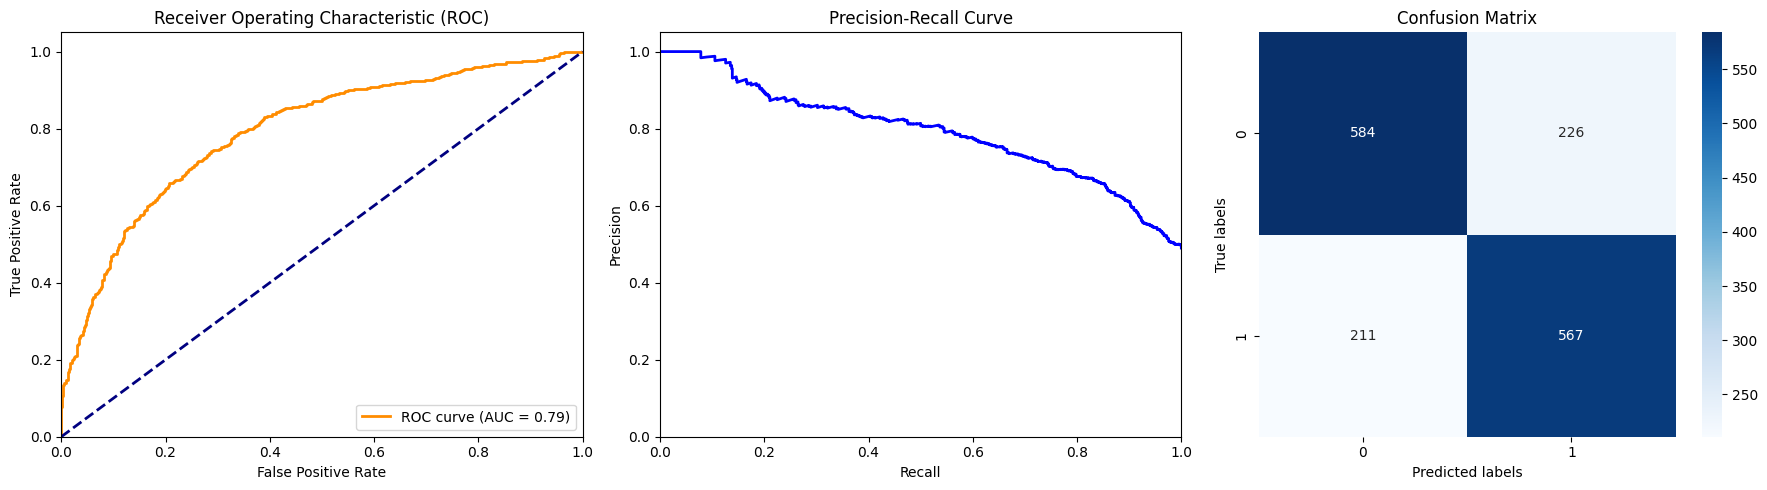

In [ ]:
plot_classification_evaluation(y_test, y_pred_logreg, y_prob_logreg)

- Receiver Operating Characteristic (ROC): Kurva ini menggambarkan laju true positive rate (TPR) versus laju false positive rate (FPR) pada berbagai ambang batas klasifikasi. Garis diagonal (garis biru) mewakili kinerja model acak, sedangkan kurva oranye menunjukkan kinerja model kita. Semakin jauh kurva dari garis diagonal, semakin baik performa modelnya.

- Precision-Recall Curve: Kurva ini menunjukkan hubungan antara presisi dan recall untuk berbagai ambang batas. Dalam konteks ini, area di bawah kurva menunjukkan kinerja keseluruhan dari model dalam hal presisi dan recall.

- Confusion Matrix: Dari matriks ini, kita dapat melihat bahwa model berhasil memprediksi 584 kasus negatif dengan benar (True Negative) dan 567 kasus positif dengan benar (True Positive). Namun, ada 226 kasus yang sebenarnya negatif tetapi diprediksi sebagai positif (False Positive) dan 211 kasus yang sebenarnya positif tetapi diprediksi sebagai negatif (False Negative).

Model Logistic Regression menunjukkan kinerja yang cukup baik dengan akurasi 72.5%. Meskipun demikian, ada beberapa kesalahan prediksi yang ditunjukkan oleh confusion matrix, yang mungkin memerlukan peningkatan lebih lanjut, misalnya dengan tuning parameter atau pemilihan fitur yang lebih tepat. Namun, dengan ROC AUC sebesar 0.793, model ini sudah menunjukkan kemampuannya dalam membedakan kelas dengan cukup baik.

**2. Random Forest**

In [ ]:
classification_evaluation(y_test, y_pred_rf, y_prob_rf)

{'Accuracy': 0.965,
 'Precision': 0.97,
 'Recall': 0.959,
 'F1 Score': 0.964,
 'ROC AUC': 0.994}

- Akurasi (Accuracy): Model memiliki akurasi 96.5%, artinya model mampu memprediksi dengan benar 96.5% dari total kasus. Ini adalah ukuran yang cukup tinggi dan menunjukkan bahwa model ini cukup handal.

- Presisi (Precision): Nilai presisi adalah 97%. Ini menunjukkan bahwa dari total prediksi positif yang dilakukan oleh model, 97% di antaranya benar-benar positif.

- Sensitivitas (Recall): Sensitivitas model adalah 95.9%. Artinya, dari seluruh kasus positif sebenarnya, model mampu mengidentifikasi 95.9% dari kasus tersebut dengan benar.

- Nilai F1 (F1 Score): Nilai F1 adalah 96.4%, menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan sensitivitas.

- ROC AUC: Nilai Area Under the Curve (AUC) untuk Receiver Operating Characteristic (ROC) adalah 0.994, yang hampir mendekati 1. Ini menunjukkan bahwa model memiliki kemampuan yang sangat baik untuk membedakan antara kelas positif dan negatif.

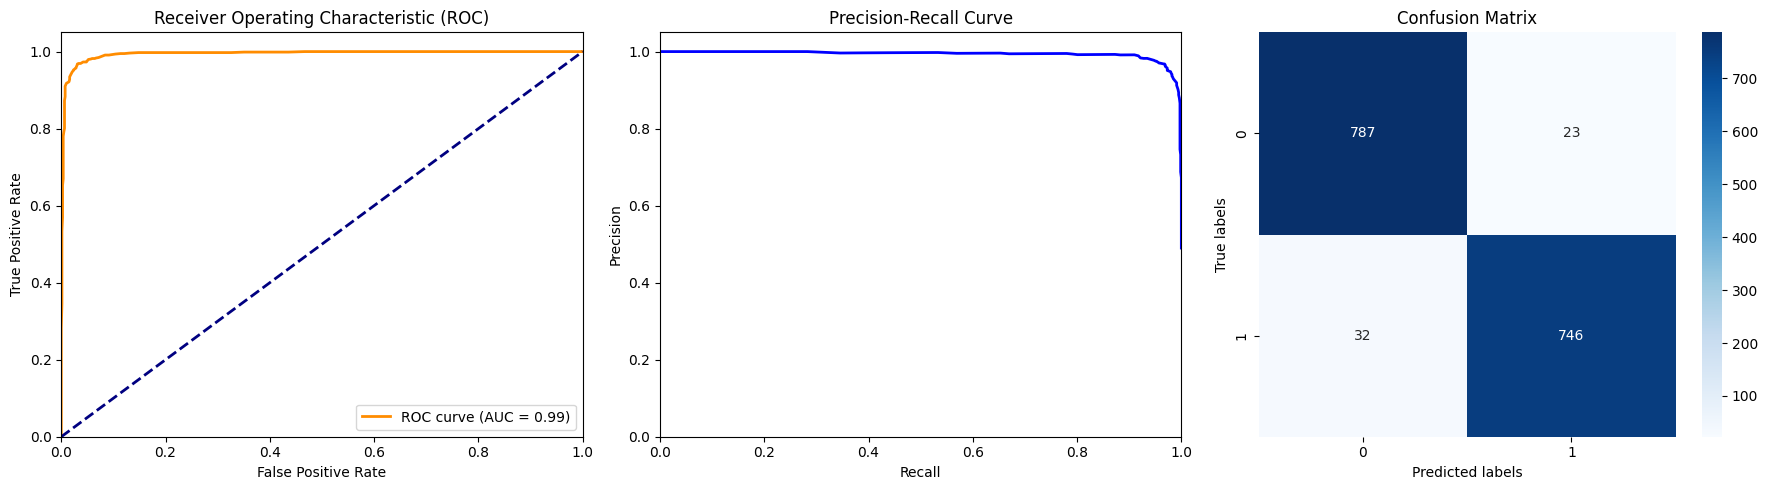

In [ ]:
plot_classification_evaluation(y_test, y_pred_rf, y_prob_rf)

- ROC Curve: Kurva ROC menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas klasifikasi. Semakin mendekati pojok kiri atas, semakin baik performa modelnya. Kurva ini menunjukkan bahwa model Random Forest memiliki performa yang luar biasa.

- Precision-Recall Curve: Kurva ini menggambarkan hubungan antara Presisi dan Sensitivitas. Idealnya, model yang sempurna akan memiliki Presisi dan Sensitivitas 1 di semua ambang batas. Model Random Forest mendekati kondisi ideal, menunjukkan performa yang kuat.

- Confusion Matrix: Dari 819 prediksi negatif (0), 787 di antaranya benar (True Negative) dan 32 salah (False Positive). Dari 769 prediksi positif (1), 746 di antaranya benar (True Positive) dan 23 salah (False Negative). Meskipun model memiliki akurasi yang tinggi, masih ada kesalahan prediksi yang perlu diperhatikan.

Model Random Forest menunjukkan performa yang sangat baik dalam prediksi, dengan akurasi, presisi, dan sensitivitas yang tinggi. Namun, masih ada kesalahan prediksi berupa False Positive dan False Negative yang perlu menjadi perhatian, karena dalam konteks bisnis, kesalahan tersebut bisa memiliki implikasi yang signifikan. Sebagai contoh, pelanggan yang sebenarnya berpotensi membeli (True Positive) tetapi diprediksi tidak akan membeli (False Negative) dapat menyebabkan kehilangan peluang bisnis. Sebaliknya, membuang sumber daya pada pelanggan yang diprediksi akan membeli (False Positive) tetapi sebenarnya tidak berminat juga tidak efisien.

**3. XGBoost**

In [ ]:
classification_evaluation(y_test, y_pred_xgb, y_prob_xgb)

{'Accuracy': 0.97,
 'Precision': 0.975,
 'Recall': 0.964,
 'F1 Score': 0.97,
 'ROC AUC': 0.994}

- Akurasi (Accuracy): Model ini memiliki akurasi sebesar 97%. Artinya, dari seluruh prediksi yang dilakukan oleh model, 97% di antaranya benar.

- Presisi (Precision): Presisi model ini adalah 97.5%. Ini menunjukkan bahwa dari semua prediksi positif yang dilakukan oleh model, 97.5% di antaranya benar-benar positif.

- Sensitivitas (Recall): Sensitivitas dari model ini adalah 96.4%. Hal ini berarti dari seluruh kasus positif yang sebenarnya, model berhasil mengidentifikasi 96.4% di antaranya dengan benar.

- Nilai F1 (F1 Score): Nilai F1 model ini adalah 97%, menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan sensitivitas.

- ROC AUC: Nilai Area Under the Curve (AUC) untuk Receiver Operating Characteristic (ROC) adalah 0.994. Nilai yang mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif.

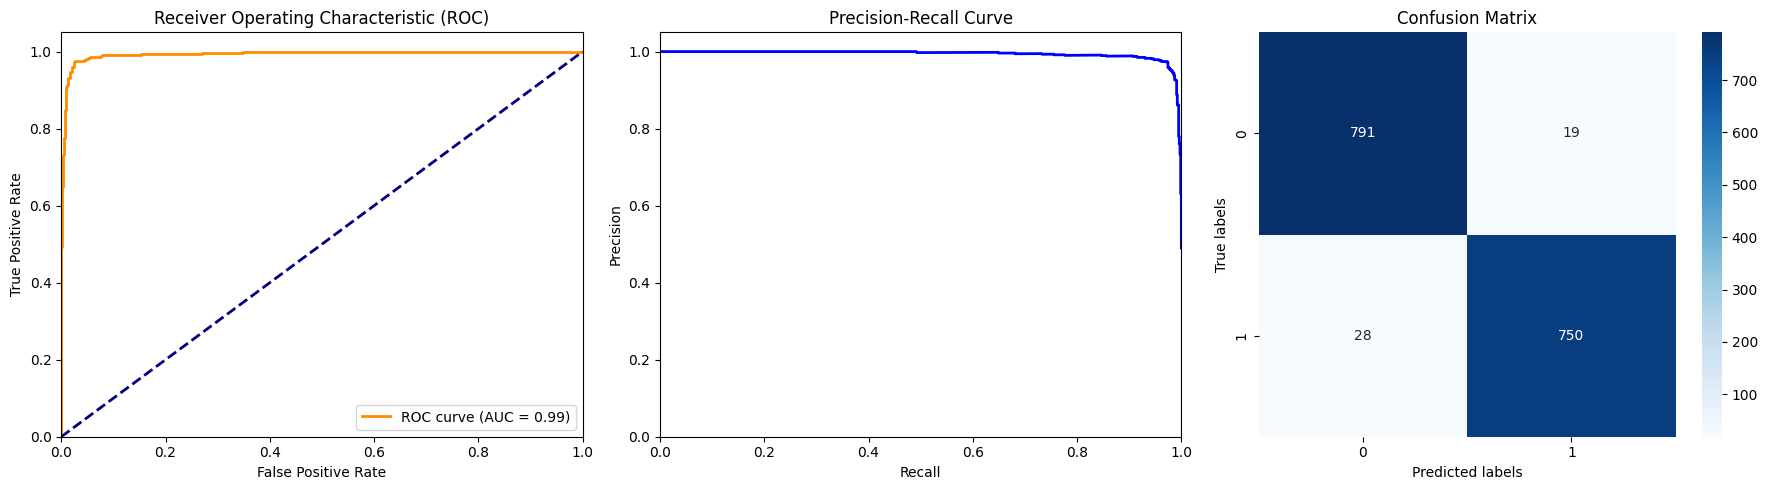

In [ ]:
plot_classification_evaluation(y_test, y_pred_xgb, y_prob_xgb)

- ROC Curve: Kurva ROC menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas klasifikasi. Model XGBoost menunjukkan performa yang sangat baik, dengan kurva yang hampir mencapai pojok kiri atas.

- Precision-Recall Curve: Kurva ini menggambarkan hubungan antara Presisi dan Sensitivitas. Model XGBoost memiliki performa yang kuat dengan kurva yang mendekati pojok kanan atas.

- Confusion Matrix: Dari 819 prediksi negatif (0), 791 di antaranya benar (True Negative) dan 28 salah (False Positive). Dari 769 prediksi positif (1), 750 di antaranya benar (True Positive) dan 19 salah (False Negative).

Model XGBoost menunjukkan performa yang luar biasa dalam prediksi dengan akurasi, presisi, dan sensitivitas yang tinggi. Namun, masih terdapat beberapa kesalahan prediksi berupa False Positive dan False Negative yang perlu menjadi perhatian. Kesalahan prediksi ini mungkin memiliki implikasi penting tergantung pada konteks penggunaannya. Sebagai contoh, dalam konteks bisnis, kesalahan dalam mengidentifikasi peluang dapat mengakibatkan kerugian.

### D. Model Evaluation: Validasi dengan cross-validation

Model evaluation menggunakan validasi dengan cross-validation adalah teknik penting dalam machine learning untuk mengukur kinerja model secara obyektif. Cross-validation membantu meminimalkan bias yang mungkin muncul ketika model dievaluasi hanya pada satu set data tertentu.

Kami menggunakan 5-fold cross-validation karena merupakan pilihan yang umum dan menjadi standar yang baik  dalam komunitas pemodelan mesin. Untuk ukuran dari dataset kami yang cukup besar, 5-fold cv memberikan estimasi kinerja yang cukup baik tanpa memakan terlalu banyak waktu. Dengan menggunakan lebih banyak lipatan, seperti 5-fold, dapat mengurangi variance dalam estimasi kinerja model. Ini berarti hasil evaluasi model akan lebih stabil.

In [ ]:
from sklearn.model_selection import cross_validate

def evaluate_model(classifier, X_train, y_train, cv_folds=5):
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(classifier, X_train, y_train, cv=cv_folds, scoring=scoring, return_train_score=True)

    cv_metrics_df = pd.DataFrame({
        'Metrik': scoring,
        'Rata-Rata Skor Training': [cv_results[f'train_{score}'].mean() for score in scoring],
        'Simpangan Baku Training': [cv_results[f'train_{score}'].std() for score in scoring],
        'Rata-Rata Skor Testing': [cv_results[f'test_{score}'].mean() for score in scoring],
        'Simpangan Baku Testing': [cv_results[f'test_{score}'].std() for score in scoring],
    })

    # Menghitung selisih antara skor pelatihan dan pengujian
    cv_metrics_df['Selisih Skor'] = cv_metrics_df['Rata-Rata Skor Training'] - cv_metrics_df['Rata-Rata Skor Testing']

    interpretasi = []
    for index, row in cv_metrics_df.iterrows():
        train_score = row['Rata-Rata Skor Training']
        test_score = row['Rata-Rata Skor Testing']
        score_difference = abs(train_score - test_score)

        if train_score > 0.7 and test_score > 0.7:
            if score_difference > 0.15 and train_score > test_score:
                interpretasi.append('Overfit')
            else:
                interpretasi.append('Well-fit')
        else:
            interpretasi.append('Underfit')

    cv_metrics_df['Interpretasi'] = interpretasi
    cv_metrics_df = cv_metrics_df.round(3)

    return cv_metrics_df

**1. Logistic Regression**

In [ ]:
cv_metrics_df = evaluate_model(logreg, X_train, y_train)
cv_metrics_df

Metrik  Rata-Rata Skor Training  Simpangan Baku Training  \
0   accuracy                    0.725                    0.003   
1  precision                    0.725                    0.002   
2     recall                    0.731                    0.004   
3         f1                    0.728                    0.003   
4    roc_auc                    0.800                    0.002   

   Rata-Rata Skor Testing  Simpangan Baku Testing  Selisih Skor Interpretasi  
0                   0.723                   0.006         0.003     Well-fit  
1                   0.721                   0.008         0.004     Well-fit  
2                   0.731                   0.007         0.000     Well-fit  
3                   0.726                   0.005         0.002     Well-fit  
4                   0.797                   0.005         0.004     Well-fit

Berdasarkan hasil evaluasi model Logistic Regression yang telah dijalankan, kita bisa menarik beberapa kesimpulan tentang kinerja model:

- Akurasi: Model menunjukkan tingkat akurasi yang konsisten antara data pelatihan dan pengujian, dengan rata-rata skor 0.725 untuk pelatihan dan 0.723 untuk pengujian. Simpangan baku yang rendah pada kedua skor (0.003 untuk pelatihan dan 0.003 untuk pengujian) menunjukkan bahwa model sangat stabil dan memberikan hasil yang serupa di berbagai fold validasi silang.

- Presisi: Skor presisi yang hampir sama antara pelatihan (0.725) dan pengujian (0.721) dengan simpangan baku yang rendah menunjukkan bahwa model mampu konsisten dalam mengidentifikasi kasus positif.

- Recall: Dengan skor recall yang hampir identik di pelatihan (0.731) dan pengujian (0.731), model dapat diandalkan dalam mengidentifikasi semua kasus positif yang relevan dari data.

- F1-Score: Skor F1 yang harmonis antara pelatihan (0.728) dan pengujian (0.726) menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall, yang penting di situasi di mana kedua aspek tersebut sama pentingnya.

- ROC-AUC: Skor Area Under the Receiver Operating Characteristic (ROC-AUC) cukup tinggi di kedua pelatihan (0.8) dan pengujian (0.797), yang menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

Keseluruhan interpretasi dari hasil ini adalah bahwa model Logistic Regression dianggap "Well-fit". Hal ini karena tidak ada perbedaan signifikan antara skor pelatihan dan pengujian untuk semua metrik yang dievaluasi, dan semua skor pengujian cukup tinggi di atas threshold yang ditentukan (0.7) untuk underfitting. Konsistensi ini menunjukkan bahwa model mampu mempelajari pola-pola umum dari data pelatihan dan menerapkannya dengan efektif pada data yang belum pernah dilihat sebelumnya (pengujian). Ini adalah sinyal bahwa model cukup umum dan tidak mengalami overfitting (di mana kinerja pelatihan jauh lebih baik daripada pengujian) atau underfitting (di mana kinerja pelatihan dan pengujian keduanya rendah).

**2. Random Forest**

In [ ]:
cv_metrics_df = evaluate_model(rf, X_train, y_train)
cv_metrics_df

Metrik  Rata-Rata Skor Training  Simpangan Baku Training  \
0   accuracy                      1.0                      0.0   
1  precision                      1.0                      0.0   
2     recall                      1.0                      0.0   
3         f1                      1.0                      0.0   
4    roc_auc                      1.0                      0.0   

   Rata-Rata Skor Testing  Simpangan Baku Testing  Selisih Skor Interpretasi  
0                   0.957                   0.006         0.043     Well-fit  
1                   0.970                   0.007         0.030     Well-fit  
2                   0.945                   0.011         0.055     Well-fit  
3                   0.957                   0.006         0.043     Well-fit  
4                   0.993                   0.001         0.007     Well-fit

Berdasarkan hasil evaluasi model Random Forest, kita bisa menarik beberapa kesimpulan tentang kinerja model:

- Akurasi: Model Random Forest mencapai skor sempurna dalam pelatihan (1.0) dan menunjukkan performa yang sangat baik pada data pengujian dengan rata-rata skor akurasi 0.957. Selisih antara skor pelatihan dan pengujian adalah 0.043, yang menunjukkan bahwa model tersebut memiliki generalisasi yang baik dan tidak menunjukkan tanda-tanda overfitting yang signifikan.

- Presisi: Sama seperti akurasi, model mencapai skor presisi sempurna pada data pelatihan (1.0) dan menunjukkan hasil yang hampir sama pada data pengujian (0.97). Ini mengindikasikan bahwa model sangat akurat dalam memprediksi kelas positif dan memiliki kemungkinan kesalahan yang rendah dalam mengklasifikasikan kelas negatif sebagai positif.

- Recall: Model memiliki skor recall 1.0 pada pelatihan, menunjukkan kemampuan untuk mengidentifikasi semua kasus positif dalam data pelatihan. Pada data pengujian, skor recall adalah 0.945, yang masih sangat tinggi, menunjukkan bahwa model mampu mengenali sebagian besar kasus positif yang sebenarnya.

- F1-Score: Dengan skor F1 sempurna pada pelatihan (1.0) dan 0.957 pada pengujian, model menunjukkan keseimbangan yang kuat antara presisi dan recall pada data yang tidak dilihat sebelumnya, yang mengindikasikan performa yang konsisten.

- ROC-AUC: Skor Area Under the Curve (AUC) dari Receiver Operating Characteristic (ROC) mencapai 1.0 pada pelatihan, menunjukkan kemampuan sempurna model dalam membedakan antara kelas-kelas. Pada data pengujian, skor ROC-AUC adalah 0.993, yang sangat tinggi, menegaskan keandalan model dalam membedakan antara kelas positif dan negatif.

Interpretasi dari hasil ini adalah bahwa model Random Forest dianggap "Well-fit" berdasarkan kriteria yang telah ditentukan. Meskipun ada perbedaan antara skor pelatihan dan pengujian, perbedaan tersebut tidak cukup besar untuk mengindikasikan overfitting. Dengan kata lain, model berhasil menangkap pola dalam data tanpa terlalu spesifik terhadap data pelatihan yang digunakan, yang dibuktikan dengan kinerja pengujian yang tinggi. Ini menandakan bahwa model Random Forest yang digunakan kemungkinan akan berkinerja baik pada data baru yang serupa dengan data pengujian.

**3. XGBoost**

In [ ]:
cv_metrics_df = evaluate_model(xgb, X_train, y_train)
cv_metrics_df

Metrik  Rata-Rata Skor Training  Simpangan Baku Training  \
0   accuracy                      1.0                      0.0   
1  precision                      1.0                      0.0   
2     recall                      1.0                      0.0   
3         f1                      1.0                      0.0   
4    roc_auc                      1.0                      0.0   

   Rata-Rata Skor Testing  Simpangan Baku Testing  Selisih Skor Interpretasi  
0                   0.956                   0.004         0.043     Well-fit  
1                   0.969                   0.007         0.031     Well-fit  
2                   0.943                   0.008         0.057     Well-fit  
3                   0.956                   0.005         0.044     Well-fit  
4                   0.990                   0.002         0.010     Well-fit

Berdasarkan hasil evaluasi model XGBoost, kita bisa menarik beberapa kesimpulan dari kinerja model:

- Akurasi: Model XGBoost mencapai skor sempurna pada pelatihan (1.0) dengan konsistensi yang luar biasa (simpangan baku 0.0), menunjukkan bahwa model ini mampu mengklasifikasikan setiap sampel pelatihan dengan benar. Pada data pengujian, model ini juga tampil sangat baik dengan skor akurasi 0.956 dan variabilitas yang sangat rendah (simpangan baku 0.004), menandakan bahwa model tersebut konsisten dalam performanya di berbagai fold validasi silang.

- Presisi: Model mencapai skor presisi sempurna di pelatihan dan mencetak skor presisi yang tinggi di pengujian (0.969), dengan simpangan baku yang sangat rendah (0.007). Ini menunjukkan bahwa ketika model memprediksi kelas positif, kemungkinan besar prediksi tersebut benar.

- Recall: Dengan skor recall sempurna pada pelatihan, model XGBoost berhasil mengidentifikasi semua kasus positif yang sebenarnya dalam data pelatihan. Pada data pengujian, model ini memiliki skor recall yang tinggi (0.943) dengan variasi yang rendah (simpangan baku 0.008), menunjukkan bahwa model cukup andal dalam mendeteksi kasus positif.

- F1-Score: F1-score sempurna pada pelatihan dan skor tinggi pada pengujian (0.956) dengan variabilitas yang rendah menunjukkan bahwa model memiliki keseimbangan yang sangat baik antara presisi dan recall, yang penting dalam situasi di mana kedua aspek tersebut sama pentingnya.

- ROC-AUC: Skor ROC-AUC yang sempurna pada pelatihan (1.0) dan sangat tinggi pada pengujian (0.99) dengan simpangan baku yang sangat rendah menegaskan bahwa model ini sangat efektif dalam membedakan antara kelas positif dan negatif.

Interpretasi keseluruhan adalah bahwa model XGBoost dianggap "Well-fit" menurut kriteria yang digunakan. Meskipun ada perbedaan antara skor pelatihan dan pengujian, perbedaan tersebut tidak menunjukkan tanda-tanda overfitting yang signifikan. Model ini menunjukkan kinerja yang sangat baik pada data pengujian dan diharapkan dapat mempertahankan tingkat kinerja ini pada data baru, asalkan karakteristik data baru tidak berbeda secara signifikan dari data yang digunakan dalam pelatihan dan pengujian.

### E. Hyperparameter Tuning

Langkah selanjutnya adalah melakukan hyperparameter tuning. Proses ini bertujuan untuk mencari konfigurasi hyperparameter terbaik yang dapat meningkatkan performa model-model tersebut. Hasil tuning memberikan parameter terbaik untuk masing-masing model.<br> Berikut hyperparameter tuning dari masing-masing model:

**1. Logistic Regression**

Hyperparameter yang digunakan:
- penalty: hyperparameter yang mengontrol jenis regularisasi yang digunakan dalam model. telah mendefinisikan pilihan 'l1', 'l2', 'elasticnet', dan 'none'. Ini memengaruhi bagaimana bobot model disesuaikan untuk menghindari overfitting.
- C: Ini adalah hyperparameter kebalikan dari kekuatan regularisasi. Semakin rendah nilai C, semakin kuat regularisasi, dan semakin tinggi nilai C, semakin lemah regularisasi.
- solver: Ini adalah algoritma yang digunakan untuk mengejar solusi optimum. telah mendefinisikan beberapa pilihan, seperti 'newton-cg', 'lbfgs', 'liblinear', 'sag', dan 'saga'. Pilihan ini memengaruhi bagaimana model diperbarui selama pelatihan.
- max_iter: Ini adalah jumlah iterasi maksimum yang digunakan oleh solver untuk mencapai konvergensi.

Pengaruhnya:
- penalty mempengaruhi jenis regularisasi yang digunakan. 'l1' dan 'l2' cenderung mengurangi overfitting, sedangkan 'elasticnet' adalah campuran keduanya. 'none' tidak menggunakan regularisasi sama sekali.
- C mempengaruhi tingkat regularisasi. Nilai yang lebih tinggi mengurangi dampak regularisasi, sementara nilai yang lebih rendah meningkatkan efek regularisasi.
- solver mempengaruhi algoritma yang digunakan untuk menghitung koefisien model.
- max_iter adalah jumlah iterasi maksimum yang digunakan oleh solver untuk mencapai konvergensi. Jumlah iterasi yang terlalu kecil dapat mengakibatkan model tidak konvergen, sedangkan jumlah iterasi yang terlalu besar dapat memakan waktu lama.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Membuat model LogisticRegression
logreg = LogisticRegression()

# Mendefinisikan grid parameter yang ingin kita cari
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-2, 2, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200],
}

# Membuat instance GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting model menggunakan data pelatihan
grid_search_logreg.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

best_params_logreg, best_score_logreg

({'C': 0.027825594022071243,
  'max_iter': 50,
  'penalty': 'l1',
  'solver': 'saga'},
 0.7263703207311852)

Pada model Logistic Regression, parameter terbaik adalah C=0.0278, max_iter=50, penalty='l1', dan solver='saga', dengan skor akurasi sekitar 0.7263. Ini adalah parameter yang menghasilkan performa terbaik pada model Regresi Logistik untuk data training yang digunakan.

**2. Random Forest**

Hyperparameter yang digunakan:
- n_estimators:<br>
Alasan: Mengontrol jumlah pohon dalam ensemble, memengaruhi akurasi dan kompleksitas komputasi.<br>
Pengaruh: Nilai yang lebih tinggi meningkatkan akurasi, tetapi membutuhkan lebih banyak sumber daya. Nilai yang lebih rendah dapat mengurangi overfitting.

- max_features:<br>
Alasan: Mengendalikan jumlah fitur yang digunakan dalam pemisahan simpul pohon, mempengaruhi variasi fitur yang digunakan.
Pengaruh: 'auto' menggunakan semua fitur, 'sqrt' dan 'log2' lebih konservatif. Mempengaruhi akurasi dan kemampuan generalisasi.

- max_depth:<br>
Alasan: Membatasi kedalaman pohon memengaruhi kompleksitas model dan mencegah overfitting.<br>
Pengaruh: 'None' tanpa batasan kedalaman, nilai tertentu membatasi kedalaman pohon.

- min_samples_split:<br>
Alasan: Kontrol jumlah sampel minimum untuk membagi simpul, memengaruhi tingkat rincian pemisahan simpul.<br>
Pengaruh: Nilai lebih tinggi menghasilkan pemisahan yang lebih kasar, nilai lebih rendah menghasilkan pemisahan yang lebih dalam.

- min_samples_leaf:<br>
Alasan: Mengendalikan jumlah sampel minimum di setiap daun pohon, mempengaruhi ukuran daun-daun.<br>
Pengaruh: Nilai lebih tinggi menghasilkan daun yang lebih besar, nilai lebih rendah menghasilkan daun yang lebih kecil dan model yang lebih kompleks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model RandomForestClassifier
rf = RandomForestClassifier()

# Mendefinisikan grid parameter untuk RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat instance GridSearchCV untuk RandomForestClassifier
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fitting model menggunakan data pelatihan
grid_search_rf.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

({'max_depth': 20,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.9609324720934704)

Parameter terbaik pada model ini yaitu termasuk kedalaman maksimum ('max_depth') = 20, jenis fitur maksimum ('max_features') = 'log2', jumlah sampel minimum di setiap leaf ('min_samples_leaf') = 1, jumlah sampel minimum yang diperlukan untuk membagi simpul ('min_samples_split') = 2, dan jumlah pohon keputusan ('n_estimators') = 300, dengan skor akurasi sekitar 0.9609. Ini adalah parameter yang menghasilkan performa terbaik pada model Random Forest Classifier untuk data training yang digunakan, akan tetapi tidak jauh lebih baik dari modelling dengan default parameter sebelumnya yang dapat memperoleh akurasi hingga 0.965.

**3. XGBoost**

Hyperparameter yang digunakan:
- learning_rate: Ini adalah tingkat pembelajaran (learning rate) untuk algoritma XGBoost. Learning rate mengontrol seberapa besar langkah yang diambil dalam setiap iterasi selama pelatihan.
Pengaruhnya :
Nilai yang lebih kecil seperti 0.1 dapat memperlambat pelatihan tetapi dapat membantu dalam mencapai konvergensi yang lebih baik.
Nilai yang lebih besar seperti 0.2 dapat mempercepat pelatihan tetapi memerlukan penyetelan yang lebih cermat.

- n_estimators: Ini adalah jumlah estimator yang akan digunakan dalam model XGBoost.
Pengaruhnya : semakin banyak estimator, semakin kuat modelnya, tetapi juga akan memerlukan lebih banyak sumber daya komputasi.

- max_depth: kedalaman maksimum yang diperbolehkan untuk setiap estimator  dalam model XGBoost.
Pengaruhnya:
Memilih nilai yang lebih tinggi dapat membuat model lebih kompleks, tetapi juga dapat menyebabkan overfitting.
Memilih nilai yang lebih rendah dapat membuat model lebih konservatif, tetapi juga dapat mengurangi kemampuan model untuk menangkap pola yang rumit dalam data.

- min_child_weight: jumlah sampel minimum yang diperlukan untuk membagi node dalam setiap estimator.
Pengaruhnya:
Memilih nilai yang lebih besar akan membuat model lebih konservatif dan mencegah overfitting.
Dengan menggunakan GridSearchCV, Anda dapat mencari kombinasi terbaik dari hyperparameter untuk mengoptimalkan model XGBClassifier sesuai dengan data pelatihan Anda. Kombinasi terbaik dari hyperparameter akan memengaruhi kompleksitas model, kemampuan model untuk menggeneralisasi, dan kinerja model pada data uji.

In [ ]:
from xgboost import XGBClassifier

# Membuat model XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Mendefinisikan grid parameter untuk XGBClassifier
param_grid_xgb = {
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5]
}

# Membuat instance GridSearchCV untuk XGBClassifier
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting model menggunakan data pelatihan
grid_search_xgb.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

best_params_xgb, best_score_xgb

({'learning_rate': 0.15,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 400},
 0.963611995309097)

Pada model ini, parameter terbaiknya adalah ('learning_rate') sebesar 0.15, ('max_depth') sebesar 6, bobot minimum anak ('min_child_weight') sebesar 1, dan jumlah estimator ('n_estimators') sebesar 400, dengan skor akurasi sekitar 0.9636. Ini adalah parameter yang menghasilkan performa terbaik pada model XGBoost Classifier, akan tetapi tidak jauh lebih baik dari modelling sebelumnya yang menggunakan default parameter yang bisa mencapai akurasi hingga 0.97.

## 2. Feature Importance

Dari hasil evaluasi model sebelumnya, hasil model XGBoost menunjukkan performa yang sangat baik berdasarkan metrik evaluasi yang diberikan. Berikut adalah penjelasan pengaruh setiap metrik terhadap bisnis, khususnya terkait dengan bisnis metric utama, yaitu Conversion Rate (CR) dan Cost Per Acquisition (CPA):

- Accuracy (97%): Tingkat keakuratan yang tinggi ini menunjukkan bahwa model mampu memprediksi konversi dengan benar sebagian besar waktu. Dalam konteks CR, ini berarti bahwa model dapat secara efektif mengidentifikasi pelanggan yang akan dan tidak akan mengkonversi, memungkinkan perusahaan untuk mengalokasikan sumber dayanya secara lebih strategis dan mengurangi pemborosan. Dampak Bisnis: Dengan peningkatan prediksi yang akurat, tim pemasaran dapat lebih fokus pada prospek dengan probabilitas konversi yang tinggi, meningkatkan CR secara keseluruhan sambil menurunkan CPA karena pengurangan sasaran yang tidak efektif.

- Precision (97.5%): Precision yang tinggi menunjukkan bahwa ketika model memprediksi bahwa seorang pelanggan akan mengkonversi, prediksinya hampir selalu benar. Ini sangat penting dalam mengoptimalkan alokasi anggaran pemasaran. Dampak Bisnis: Meminimalkan biaya dengan mengurangi jumlah false positives—yaitu, pelanggan yang diprediksi akan konversi tetapi tidak—dapat menurunkan CPA dan meningkatkan alokasi sumber daya pemasaran.

- Recall (96.4%): Recall yang tinggi menunjukkan bahwa model berhasil mengidentifikasi sebagian besar pelanggan yang sebenarnya mengkonversi. Ini penting untuk memastikan bahwa peluang penjualan tidak terlewat. Dampak Bisnis: Recall yang tinggi mengurangi jumlah false negatives, yaitu pelanggan yang akan konversi tetapi tidak diidentifikasi oleh model. Ini memaksimalkan potensi pendapatan dan dapat meningkatkan CR dengan menangkap sebanyak mungkin pelanggan yang akan konversi.

- F1 Score (97%): F1 Score adalah rata-rata harmonik dari precision dan recall, memberikan balance antara keduanya. Skor F1 yang tinggi menunjukkan bahwa model sangat baik dalam menyeimbangkan kebutuhan untuk mengidentifikasi pelanggan yang tepat tanpa melewatkan pelanggan potensial yang akan konversi. Dampak Bisnis: Skor F1 yang tinggi mencerminkan keseimbangan antara mengurangi biaya dan memaksimalkan konversi, yang secara langsung mendukung peningkatan CR dan pengurangan CPA.

- ROC AUC (99.4%): Area Under the Receiver Operating Characteristic Curve (ROC AUC) yang tinggi ini menunjukkan bahwa model memiliki kemampuan diskriminasi yang sangat baik untuk membedakan antara kelas positif dan negatif (konversi vs non-konversi). Dampak Bisnis: ROC AUC yang tinggi berarti model dapat dengan sangat baik membedakan antara pelanggan yang akan konversi dan yang tidak, yang mendukung pemasaran yang lebih tertarget dan strategis, membantu meningkatkan CR dan mengurangi CPA.

Selanjutnya akan dilakukan tahap analisis fitur-fitur yang berpengaruh pada prediksi model menggunakan feature importance dan shap values.

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(9, 6))
    ax.invert_yaxis()

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

def show_feature_importance_2(model):
    feat_importances = pd.Series(abs(model.coef_[0]), index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(9, 6))
    ax.invert_yaxis()

    plt.xlabel('Absolute Coefficient')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

**Feature Importance XGBoost**

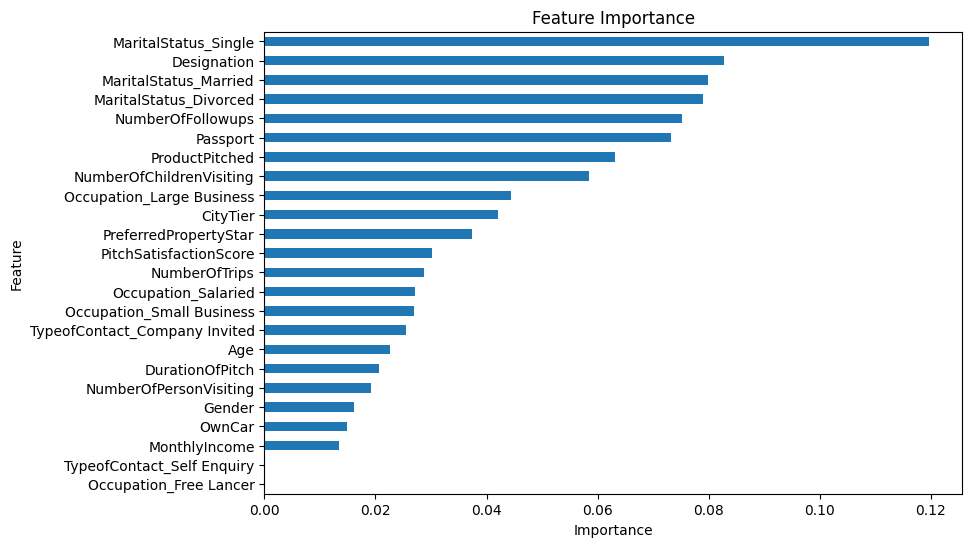

In [ ]:
show_feature_importance(xgb)

Dari grafik Feature Importance yang dihasilkan oleh model XGBoost, kita dapat menarik beberapa insight penting:

1. MaritalStatus_Single: Status pernikahan 'Single' tampaknya memiliki pengaruh paling signifikan terhadap prediksi model. Ini bisa menunjukkan bahwa pelanggan yang belum menikah memiliki kecenderungan lebih tinggi untuk tertarik pada paket Wellness Tourism, mungkin karena mereka memiliki fleksibilitas lebih dalam hal pengeluaran atau keputusan perjalanan.

2. Designation: Jabatan atau tingkat karier pelanggan berikutnya dalam urutan kepentingan, menandakan bahwa posisi dalam pekerjaan mungkin berkorelasi erat dengan keputusan pembelian paket liburan, yang bisa dikaitkan dengan tingkat pendapatan atau gaya hidup.

3. MaritalStatus_Married dan MaritalStatus_Divorced: Kedua status pernikahan ini juga menonjol, yang menunjukkan bahwa keadaan pernikahan secara umum adalah faktor penting yang perlu dipertimbangkan dalam memprediksi minat terhadap paket liburan.

4. NumberOfFollowups: Jumlah tindak lanjut yang dilakukan setelah penjualan memiliki pengaruh yang kuat, mengindikasikan bahwa upaya pemasaran yang persisten dan personalisasi komunikasi dapat meningkatkan kesuksesan dalam penjualan.

5. Passport: Kepemilikan paspor sebagai indikator kemungkinan melakukan perjalanan internasional, menunjukkan pentingnya mobilitas pelanggan dalam menentukan minat mereka pada paket liburan.

6. ProductPitched dan NumberOfChildrenVisiting: Produk yang dijelaskan kepada pelanggan dan jumlah anak yang ikut dalam perjalanan juga berpengaruh, menekankan pentingnya personalisasi paket berdasarkan kebutuhan keluarga.

7. CityTier dan PreferredPropertyStar: Tingkat perkembangan kota dan preferensi bintang properti menunjukkan bahwa faktor geografis dan preferensi kualitas akomodasi dapat berdampak pada keputusan pembelian.

8. PitchSatisfactionScore dan NumberOfTrips: Kepuasan terhadap pitch penjualan dan frekuensi perjalanan menunjukkan bahwa pengalaman pelanggan sebelumnya dan kebiasaan perjalanan mereka merupakan faktor penting dalam model prediksi.

9. Occupation_Salaried dan Occupation_Small Business: Jenis pekerjaan juga memainkan peran dalam memprediksi kecenderungan pembelian, dengan pekerjaan tetap dan pemilik bisnis kecil memberikan kontribusi yang berarti.

Fitur dengan pengaruh lebih rendah, seperti Gender, OwnCar, MonthlyIncome, dan TypeofContact, meskipun memiliki pengaruh yang lebih kecil dalam model, tetap memberikan nuansa yang penting dan tidak boleh diabaikan sepenuhnya dalam pemahaman keseluruhan tentang perilaku pelanggan.

In [ ]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.9 MB/s eta 0:00:00


In [ ]:
import shap

def shap_plot(model):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_size=(10, 5))

def shap_plot_2(model):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values[1], X_test, plot_size=(10, 5))

**Shap Values XGBoost**

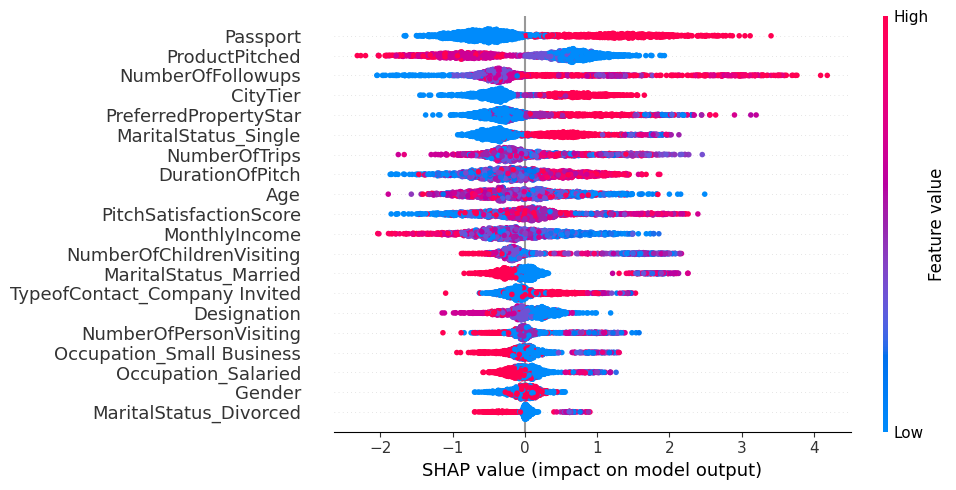

In [ ]:
shap_plot(xgb)

SHAP (SHapley Additive exPlanations) adalah metode untuk menginterpretasikan hasil prediksi model machine learning. SHAP values memberikan wawasan tentang bagaimana setiap fitur berkontribusi terhadap prediksi untuk setiap observasi. Dari grafik SHAP (SHapley Additive exPlanations) values untuk model XGBoost, kita dapat menarik beberapa insight mengenai kontribusi setiap fitur terhadap prediksi model:

1. Passport: Fitur ini memiliki SHAP values yang tinggi dan tersebar luas, menunjukkan bahwa kepemilikan paspor memiliki pengaruh yang besar dan konsisten dalam meningkatkan kemungkinan seseorang membeli paket liburan, yang menandakan pentingnya mobilitas internasional.

2. ProductPitched: Variabilitas yang tinggi pada SHAP values menunjukkan bahwa jenis produk yang ditawarkan memiliki dampak yang berbeda-beda terhadap keputusan pembelian tergantung pada konteks pelanggan.

3. NumberOfFollowups: Fitur ini memiliki SHAP values yang signifikan dan positif, menunjukkan bahwa semakin banyak tindak lanjut yang dilakukan, semakin besar peluang pelanggan untuk terkonversi menjadi pembelian.

4. CityTier: Fitur ini memiliki efek yang bervariasi, dengan beberapa nilai yang sangat positif, menunjukkan bahwa tingkat perkembangan kota berkontribusi terhadap keputusan pembelian dalam beberapa kasus.

5. PreferredPropertyStar: Terdapat variasi pada efek fitur ini, dengan beberapa SHAP values yang tinggi dan positif, mengindikasikan bahwa preferensi untuk properti dengan rating tinggi dapat secara signifikan meningkatkan kecenderungan pembelian.

6. MaritalStatus_Single: Fitur ini menunjukkan bahwa pelanggan yang belum menikah cenderung lebih terbuka terhadap pembelian paket liburan Wellness, mungkin karena mereka lebih mungkin mencari pengalaman baru dan memiliki lebih sedikit keterbatasan dalam pengambilan keputusan perjalanan.

7. NumberOfTrips dan DurationOfPitch: Kedua fitur ini menunjukkan variabilitas SHAP values yang lebih rendah dibandingkan dengan fitur lain, namun masih memiliki kontribusi positif yang signifikan, menunjukkan pentingnya frekuensi perjalanan dan efektivitas presentasi penjualan.

8. Age: Meskipun SHAP values untuk usia tidak setinggi fitur lain, masih ada beberapa titik data yang memiliki kontribusi positif yang kuat, menunjukkan bahwa usia dapat mempengaruhi keputusan pembelian dalam skenario tertentu.

9. PitchSatisfactionScore dan MonthlyIncome: Kedua fitur ini memiliki SHAP values yang lebih kecil, namun tetap memberikan kontribusi terhadap output model, mengindikasikan bahwa kepuasan terhadap pitch dan pendapatan bulanan memiliki efek pada kemungkinan pembelian.

10. Occupation dan MaritalStatus: Fitur-fitur yang berkaitan dengan pekerjaan dan status pernikahan memiliki kontribusi yang lebih rendah, namun masih penting untuk dipertimbangkan karena mereka memberikan nuansa tambahan dalam pemahaman perilaku pembelian.

Meskipun beberapa fitur memiliki kontribusi yang lebih kecil, kombinasi fitur-fitur tersebut memberikan gambaran yang lebih lengkap dan membantu model untuk menangkap pola yang lebih kompleks dalam data.

# Summary & Business Recommendation

**Kesimpulan**

Berdasarkan analisis dari grafik feature importance dan shap values, berikut ini merupakan beberapa kesimpulan yang dapat diambil:

1. Kepentingan Demografi dan Personal: Faktor-faktor demografis seperti status pernikahan (terutama bagi pelanggan yang belum menikah) dan jabatan atau Designation pelanggan menunjukkan pengaruh yang signifikan dalam keputusan pembelian paket liburan Wellness. Ini menegaskan bahwa karakteristik personal pelanggan sangat penting dalam menentukan minat dan kemampuan mereka untuk membeli paket liburan yang ditawarkan.

2. Kepentingan Interaksi Pelanggan: Durasi dan efektivitas interaksi penjualan (DurationOfPitch) dan frekuensi follow-up (NumberOfFollowups) memiliki peran penting dalam mempengaruhi keputusan pembelian. Ini mengindikasikan bahwa personalisasi dan upaya persisten dalam pemasaran memainkan peran kunci dalam suksesnya konversi penjualan.

3. Preferensi dan Kemampuan untuk Travel: Kepemilikan paspor sebagai indikator kesiapan untuk perjalanan internasional adalah faktor utama yang mempengaruhi keputusan pembelian. Preferensi terhadap properti dengan rating tinggi (PreferredPropertyStar) dan jumlah perjalanan sebelumnya (NumberOfTrips) juga memberikan kontribusi yang signifikan, yang menunjukkan bahwa pengalaman dan ekspektasi pelanggan terhadap perjalanan berdampak pada keputusan mereka.

4. Perbedaan Pengaruh Fitur: Terdapat perbedaan tingkat pengaruh antar fitur, dengan beberapa fitur seperti Passport dan MaritalStatus_Single memiliki pengaruh yang lebih kuat dan konsisten, sedangkan fitur lain seperti MonthlyIncome dan Gender memiliki pengaruh yang lebih rendah tetapi masih relevan. Hal ini menunjukkan bahwa model prediktif harus mempertimbangkan berbagai aspek dari profil pelanggan untuk memprediksi keputusan pembelian secara akurat.

5. Strategi Pemasaran yang Ditargetkan: Mengingat variasi dan distribusi SHAP values, strategi pemasaran yang berhasil harus disesuaikan secara khusus berdasarkan profil pelanggan. Segmentasi pelanggan yang efektif akan memungkinkan perusahaan untuk menargetkan individu dengan penawaran yang paling relevan, berdasarkan faktor-faktor yang telah diidentifikasi sebagai yang paling berpengaruh.

**Rekomendasi Bisnis**

Berdasarkan analisis Feature Importance dan SHAP values dari model prediktif, serta dengan mempertimbangkan metric utama seperti Conversion Rate (CR) dan Cost Per Acquisition (CPA), berikut adalah rekomendasi bisnis dan dampak yang diharapkan dari setiap keputusan:

1. Segmentasi dan Targeting yang Lebih Baik:

    Fokuskan upaya pemasaran pada pelanggan dengan status pernikahan 'Single', memiliki paspor, dan menunjukkan preferensi untuk properti bintang tinggi. Ini akan meningkatkan CR karena segment ini terbukti lebih cenderung untuk konversi.
    Dampak Bisnis: Strategi targeting yang lebih tepat akan mengarah pada penggunaan sumber daya pemasaran yang lebih efisien, meningkatkan CR, dan menurunkan CPA karena konversi yang lebih tinggi dari kelompok target yang lebih responsif.

2. Optimisasi Interaksi Penjualan:

    Lakukan peninjauan dan penyesuaian pada durasi dan isi pitch penjualan (DurationOfPitch) untuk memaksimalkan efektivitas interaksi dengan pelanggan. Train tim penjualan untuk menyesuaikan pendekatan berdasarkan data demografis dan perilaku pelanggan.
    Dampak Bisnis: Interaksi penjualan yang lebih personal dan efektif akan meningkatkan kepuasan pelanggan dan kemungkinan konversi, berkontribusi pada peningkatan CR dan penurunan CPA melalui peningkatan ROI dari interaksi penjualan.

3. Kampanye Follow-up yang Efektif:

    Intensifkan jumlah tindak lanjut (NumberOfFollowups) dengan komunikasi yang disesuaikan berdasarkan data pelanggan. Gunakan informasi dari model untuk memahami waktu dan cara terbaik untuk mengikuti prospek.
    Dampak Bisnis: Tindak lanjut yang lebih sering dan relevan dengan pelanggan akan meningkatkan kemungkinan konversi, berpotensi meningkatkan CR dan menurunkan CPA dengan memperkuat hubungan pelanggan dan meningkatkan kepercayaan.

4. Pengalaman dan Ekspektasi Perjalanan:

    Kembangkan paket liburan yang disesuaikan untuk pelanggan dengan pengalaman perjalanan sebelumnya (NumberOfTrips) dan yang mencari pengalaman perjalanan berkualitas (PreferredPropertyStar).
    Dampak Bisnis: Menawarkan produk yang disesuaikan dengan pengalaman dan ekspektasi pelanggan akan meningkatkan nilai yang dirasakan, yang dapat meningkatkan CR dan mengurangi CPA karena nilai tambah yang ditawarkan.

5. Analisis Kesiapan Perjalanan:

    Gunakan kepemilikan paspor sebagai indikator utama dalam menentukan kesiapan pelanggan untuk paket liburan internasional dan targetkan mereka dengan kampanye khusus.
    Dampak Bisnis: Pemfokusan pada pelanggan yang telah siap untuk perjalanan internasional akan meningkatkan efektivitas kampanye, yang akan meningkatkan CR dan menurunkan CPA.

**Kesimpulan dan Dampak Bisnis Keseluruhan:**

Rekomendasi di atas dirancang untuk memanfaatkan pemahaman mendalam tentang apa yang memotivasi pelanggan kita. Dengan memfokuskan sumber daya pada segmen pelanggan yang paling mungkin untuk mengonversi dan mengoptimalkan interaksi kita dengan mereka, kita dapat mengharapkan peningkatan yang signifikan dalam CR dan penurunan dalam CPA. Ini akan menghasilkan penggunaan anggaran pemasaran yang lebih efisien, pelanggan yang lebih puas dengan tingkat loyalitas yang lebih tinggi, dan akhirnya, pertumbuhan pendapatan yang berkelanjutan.